<a href="https://colab.research.google.com/github/BelenFranzoni/DiploCsDatos2024/blob/main/ExplorayCura/Ult_Analisis_Var_num_Entregable_parte_2_2024_03_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2024**


----

# Trabajo práctico entregable - parte 2


In [1]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [2]:
#@title Descargo el DataSet.
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Tras esta primer presentación de los datos, observamos que hay 13580 entradas en nuestra tabla con 21 Variables.
Cuatro de estas Variables, no están completas:

Car

BuildingArea

YearBuilt

CouncilArea

# Información del Data Set - 21 Columnas:

0 - Suburb: region - <font color ="Blue"> **Objeto**

1 - Address: property address - <font color ="Blue"> **Objeto**

2 - Rooms: Number of rooms - <font color ="Green"> **Numérica**

3 - Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential. - <font color ="Blue"> **Objeto**

4 - Price: Price in dollars - <font color ="Green"> **Numérica**

5 - Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. - <font color ="Blue"> **Objeto**

6 - SellerG: Real Estate Agent - <font color ="Blue"> **Objeto**

7 - Date: Date sold - <font color ="Blue"> **Objeto**

8 - Distance: Distance from CBD - <font color ="Green"> **Numérica**

9 - PostCode - <font color ="Green"> **Numérica**

10 - Bedroom2 : Scraped # of Bedrooms (from different source) - <font color ="Green"> **Numérica**

11 - Bathroom: Number of Bathrooms - <font color ="Green"> **Numérica**

12 - Car: Number of carspots - <font color ="Green"> **Numérica**

13 - Landsize: Land Size - <font color ="Green"> **Numérica**

14 - BuildingArea: Building Size - <font color ="Green"> **Numérica**

15 - YearBuilt - <font color ="Green"> **Numérica**

16 - CouncilArea: Governing council for the area - <font color ="Blue"> **Objeto**

17 - Lattitude - <font color ="Green"> **Numérica**

18 - Logitude - <font color ="Green"> **Numérica**

19 - Regionname: General Region (West, North West, North, North east …etc) - <font color ="Blue"> **Objeto**

20 - Propertycount: Number of properties that exist in the suburb. - <font color ="Green"> **Numérica**



In [3]:
#@markdown Despliego algunos datos del DataSet
melb_df.sample(10)

Suburb             Address  Rooms Type      Price Method  \
3759       Maidstone      4/6 Crefden St      2    u   360000.0     PI   
7766          Coburg         110 Bell St      3    h   710000.0      S   
3640             Kew   24 Fitzwilliam St      5    h  1975000.0      S   
8717   Campbellfield    33 Rainsford Tce      3    h   445000.0      S   
13126      Brunswick      43 Mitchell St      4    h  1275000.0     PI   
8119     Murrumbeena      5/25 Hobart Rd      1    u   261000.0     PI   
11548   Williamstown         47 Pasco St      4    h  1920000.0     SP   
12601    Sandringham  121 Sandringham Rd      5    h  2290000.0      S   
7661         Burwood      1/24 Daniel St      3    t   975000.0     VB   
9208             Kew     139 Eglinton St      2    h   912500.0      S   

         SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
3759       Pagan  23/04/2016       9.2    3012.0  ...       2.0  1.0   
7766       Barry  29/04/2017       7.8    3058.0  ...       1.0  1.0   
3640         Kay  18/06/2016       5.6    3101.0  ...       2.0  1.0   
8717   Harcourts  20/05/2017      14.5    3061.0  ...       1.0  2.0   
13126     Jellis  23/09/2017       5.2    3056.0  ...       1.0  2.0   
8119    Woodards  22/04/2017      12.1    3163.0  ...       1.0  1.0   
11548   Williams  15/07/2017       6.8    3016.0  ...       2.0  0.0   
12601   Marshall   9/09/2017      15.2    3191.0  ...       3.0  2.0   
7661        Reed   8/04/2017      11.7    3125.0  ...       2.0  2.0   
9208      Domain   3/06/2017       5.4    3101.0  ...       1.0  2.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
3759        0.0          90.0        NaN  Maribyrnong -37.77760   144.87230   
7766      160.0         120.0        NaN     Moreland -37.74110   144.96570   
3640      531.0        1022.0     1890.0   Boroondara -37.81300   145.04110   
8717      534.0           NaN        NaN         Hume -37.67410   144.96980   
13126     518.0           NaN        NaN          NaN -37.75883   144.96749   
8119        0.0           NaN     1960.0    Glen Eira -37.88670   145.06990   
11548     388.0         178.0     1900.0  Hobsons Bay -37.86159   144.89926   
12601     553.0         273.0     1925.0          NaN -37.95185   145.01859   
7661      267.0         150.0     2012.0   Whitehorse -37.84630   145.10710   
9208      239.0           NaN        NaN   Boroondara -37.80080   145.04336   

                  Regionname Propertycount  
3759    Western Metropolitan        3873.0  
7766   Northern Metropolitan       11204.0  
3640   Southern Metropolitan       10331.0  
8717   Northern Metropolitan        1889.0  
13126  Northern Metropolitan       11918.0  
8119   Southern Metropolitan        4442.0  
11548   Western Metropolitan        6380.0  
12601  Southern Metropolitan        4497.0  
7661   Southern Metropolitan        5678.0  
9208   Southern Metropolitan       10331.0  

[10 rows x 21 columns]

# <font color ="Green"> **Análisis de Variables Numéricas, previo al Encoding y a la Imputación**

Voy a trabajar con el Data Frame "melb_df" para extraer algunas variables numéricas:

Creo la variable "Interesting_var" con variables numéricas de interés


Voy a preparar gráficos tipo Boxplot e histogramas para analizar estas variables, si hay algunas que tengan muchos puntos con gran variación

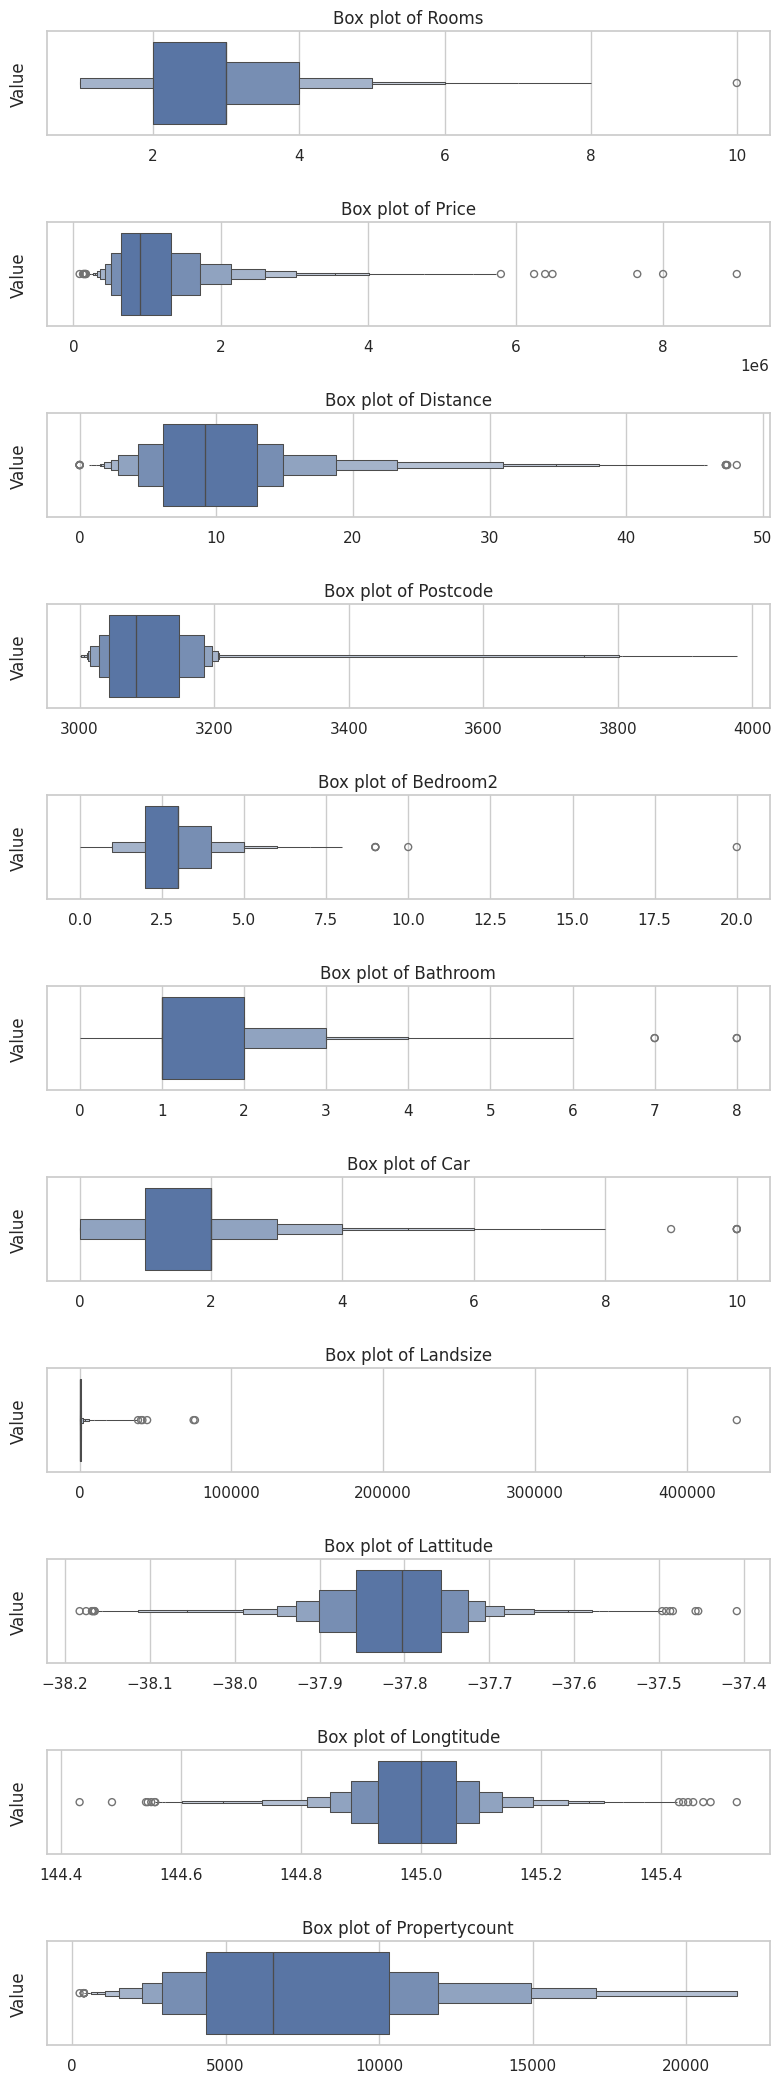

In [4]:
# @title Podemos realizar un gráfico Boxen, comparando la distribución de datos entre las **Variables Numéricas** del Nuevo Data Frame,
# @markdown En este análisis sólo incluiremos:
# @markdown 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
# @markdown 'Landsize', 'Propertycount'
# Sample DataFrame
Interesting_var= ['Rooms', 'Price', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
melb_numerical_var = melb_df[Interesting_var]

Important_var_col = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2',
                     'Bathroom', 'Car','Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
melb_numerical_var_2 = melb_numerical_var[Important_var_col]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(8, 21))

# Loop through each column and create a boxplot
for ax, column in zip(axes, melb_numerical_var_2.columns):
    sns.boxenplot(x=melb_numerical_var_2[column], ax=ax)
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('')  # Remove x-label to avoid clutter
    ax.set_ylabel('Value')  # Set a common y-label for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Si realizamos la limpieza de los datos de esta columna quedan valores más limpios para trabajar posteriormente.
# Agregaremos una limpieza por quantiles de las tablas
Podemos limpiar las variables Landsize, Bedroom2, Bathroom, Car , Distance y Price.

In [5]:
# @title
# Calculate the 1st and 99.5th percentiles for the specified columns
Important_var_col2 = ['Price', 'Distance', 'Bedroom2', 'Bathroom',
                     'Car' ,'Landsize',]
quantiles = melb_df[Important_var_col2].quantile([0.005, 0.995])

melb_df_1 = melb_df
# Filter the DataFrame to keep only the data within the 1st and 99th percentiles for the specified columns
for column_f in Important_var_col2:
    lower_bound = quantiles.loc[0.005, column_f]
    upper_bound = quantiles.loc[0.995, column_f]
    melb_df_2 = melb_df_1[(melb_df_1[column_f] >= lower_bound) & (melb_df_1[column_f] <= upper_bound)]
    melb_df_1 = melb_df_2
# Print the cleaned DataFrame
#print(melb_df_2)
melb_df_2.info()
# Optionally, save the cleaned DataFrame to a new CSV file
#df.to_csv('cleaned_data.csv', index=False)
print('Nombre del DataFrame filtrado: melb_df_2 ')

<class 'pandas.core.frame.DataFrame'>
Index: 13100 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13100 non-null  object 
 1   Address        13100 non-null  object 
 2   Rooms          13100 non-null  int64  
 3   Type           13100 non-null  object 
 4   Price          13100 non-null  float64
 5   Method         13100 non-null  object 
 6   SellerG        13100 non-null  object 
 7   Date           13100 non-null  object 
 8   Distance       13100 non-null  float64
 9   Postcode       13100 non-null  float64
 10  Bedroom2       13100 non-null  float64
 11  Bathroom       13100 non-null  float64
 12  Car            13100 non-null  float64
 13  Landsize       13100 non-null  float64
 14  BuildingArea   6888 non-null   float64
 15  YearBuilt      7922 non-null   float64
 16  CouncilArea    11835 non-null  object 
 17  Lattitude      13100 non-null  float64
 18  Longtitude 

# Ahora revisamos los boxenplots nuevamente

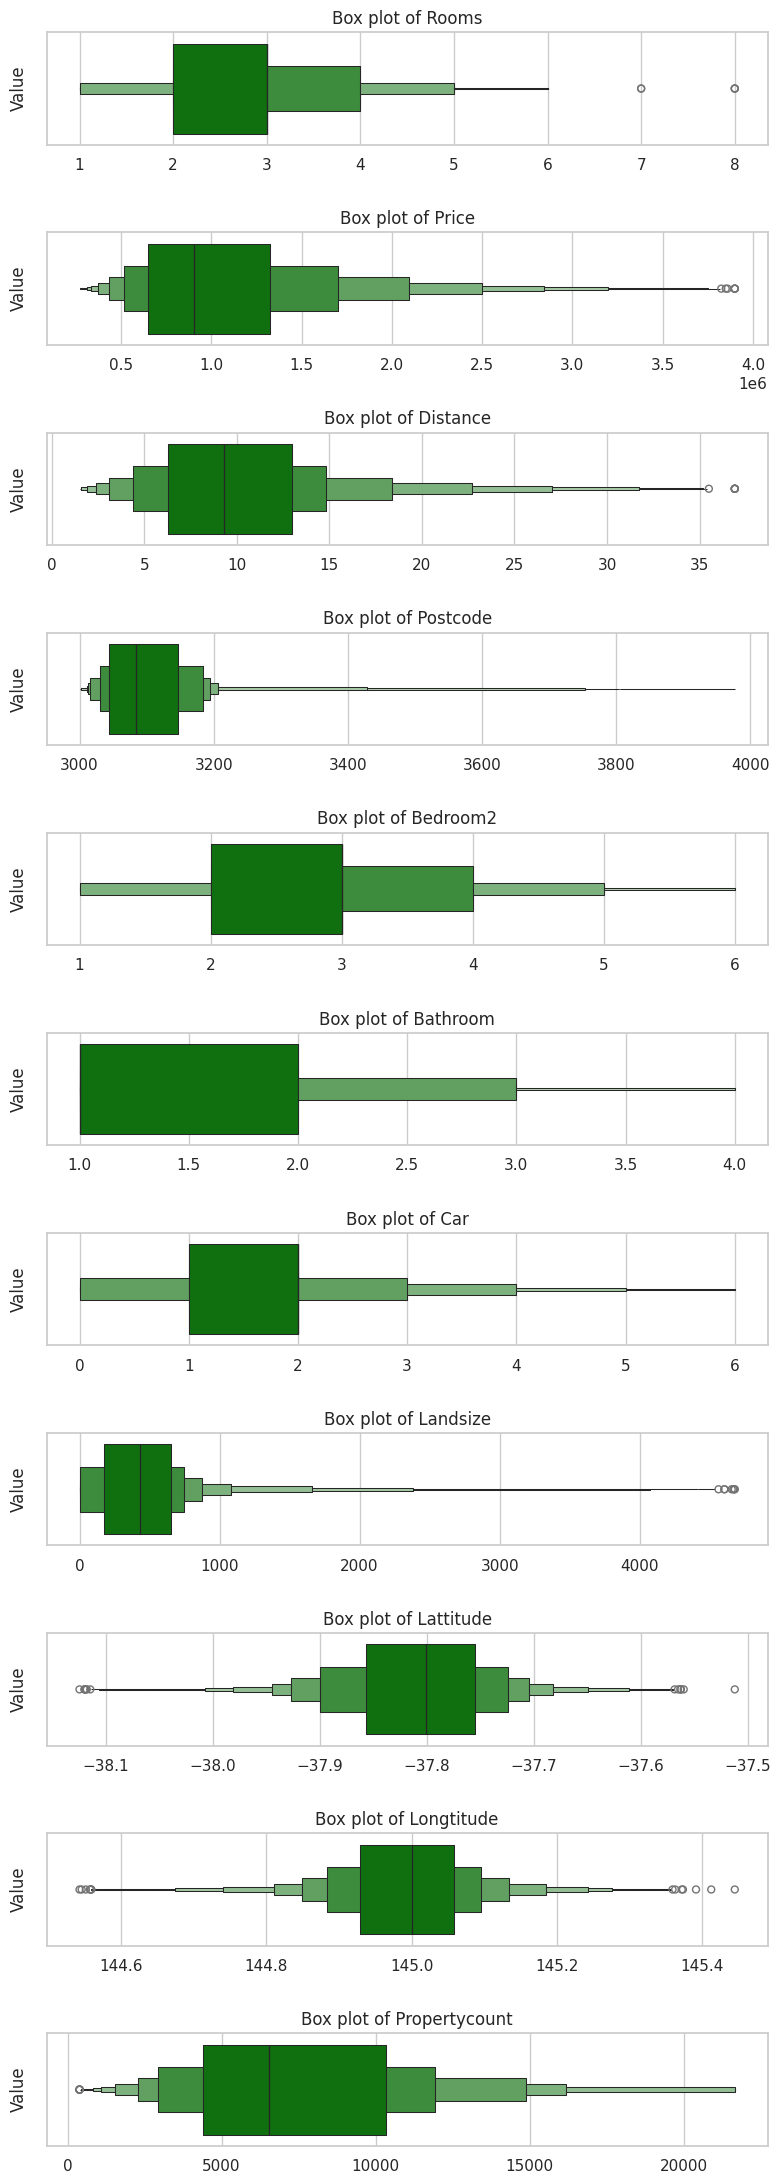

In [6]:
# @title Gráfico Boxen, comparando la distribución de datos entre las **Variables Numéricas** del Nuevo Data Frame Filtrado por quantiles 0,5 y 99,5,
# @markdown En este análisis sólo incluiremos:
# @markdown 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
# @markdown 'Landsize', 'Propertycount'
# @ Ahora los datos bajaron a de 13580 a 13093
# Sample DataFrame

##Important_var_col = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom',
##                    'Car' ,'Landsize', 'Propertycount']
melb_numerical_var_f = melb_df_2[Important_var_col]

# Set the style of seaborn
sns.set(style="whitegrid")
sns.color_palette("husl", 8)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(8, 22))


# Loop through each column and create a boxplot
for ax, column in zip(axes, melb_numerical_var_f.columns):
    sns.boxenplot(x=melb_numerical_var_f[column], ax=ax, color='green')
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('')  # Remove x-label to avoid clutter
    ax.set_ylabel('Value')  # Set a common y-label for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

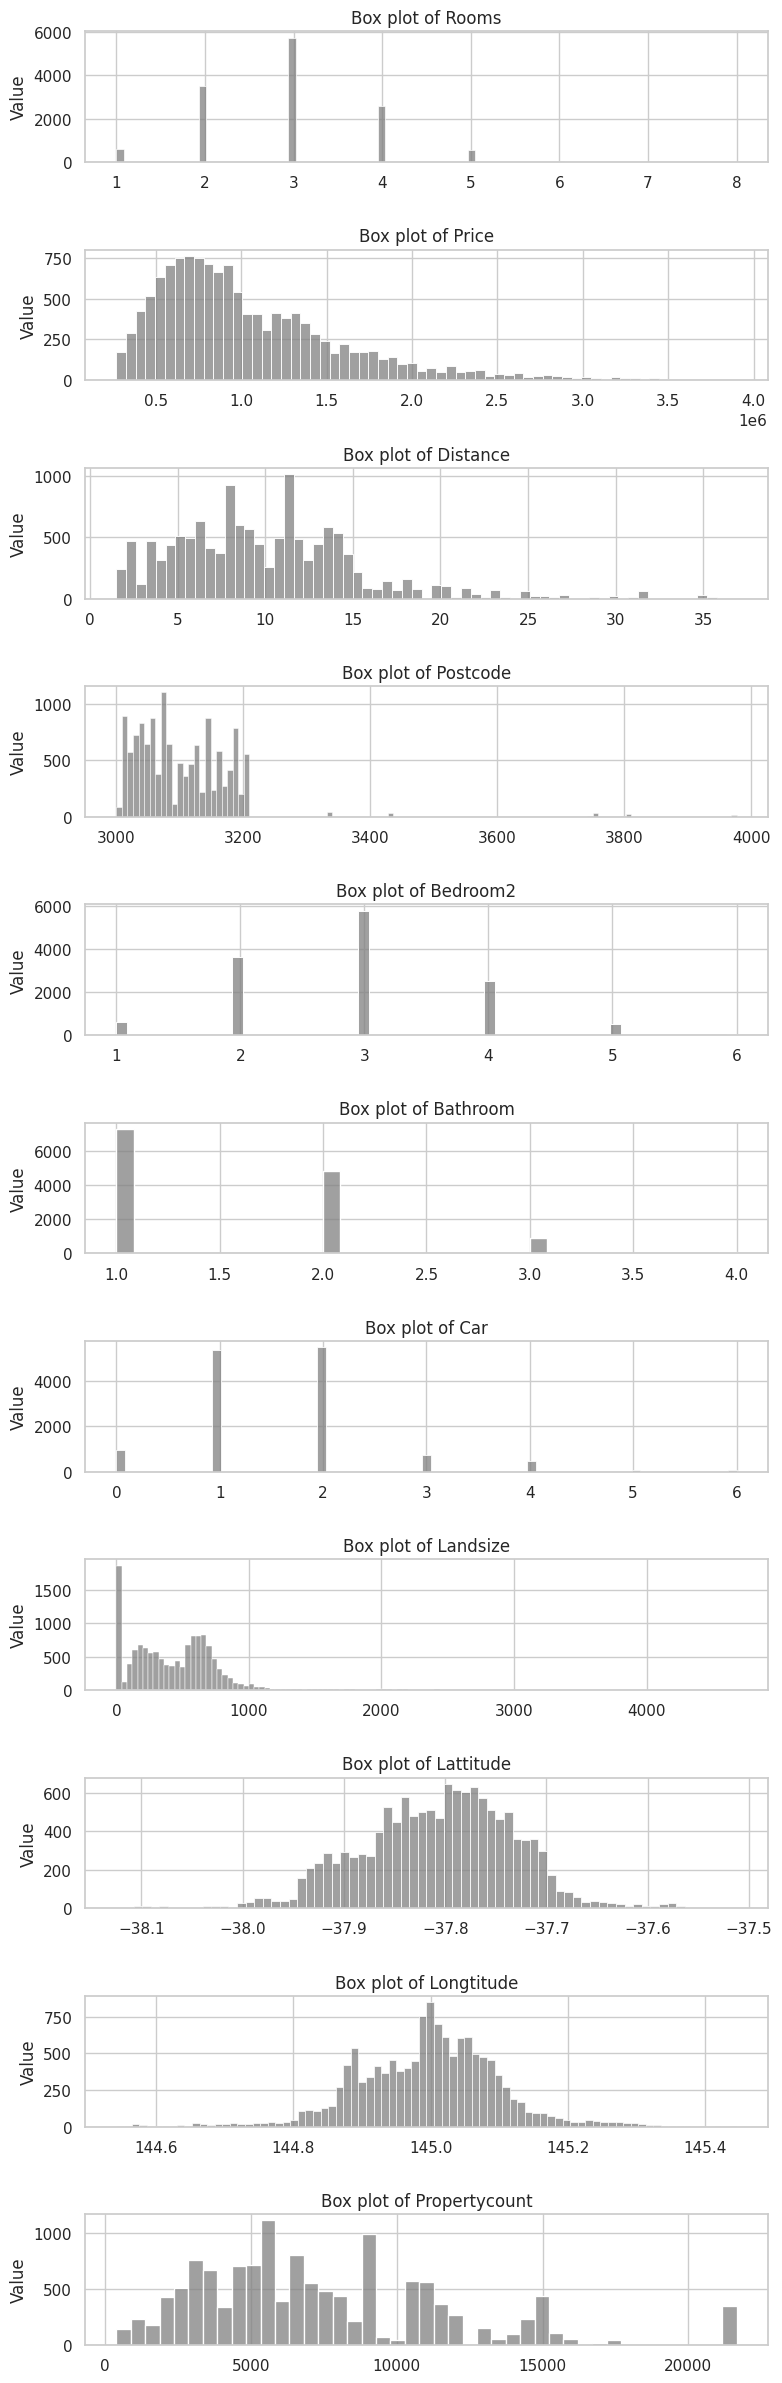

In [7]:
# @title Grafico Histograma , comparando la distribución de datos entre las **Variables Numéricas** del Nuevo Data Frame Filtrado por quantiles 0,5 y 99,5,
# @markdown En este análisis sólo incluiremos:
# @markdown 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
# @markdown 'Landsize', 'Propertycount'
# @ Ahora los datos bajaron a de 13580 a 13100
# Sample DataFrame



# Set the style of seaborn
sns.set(style="whitegrid")
sns.color_palette("husl", 8)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(8, 24))


# Loop through each column and create a boxplot
for ax, column in zip(axes, melb_numerical_var_f.columns):
    sns.histplot(x=melb_numerical_var_f[column], ax=ax, color='gray')
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('')  # Remove x-label to avoid clutter
    ax.set_ylabel('Value')  # Set a common y-label for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Al ver estas distribuciones en Landsize hay muchos datos con un LandSize de 0, quizás pueda deberse a departamentos por ejemplo. No borraremos estos puntos de Base de Datos, pero no lo tendremos en cuenta para el análisis PCA


# La base de Datos, cuyos datos numéricos se han limpiado es melb_df_2

In [8]:
melb_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13100 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13100 non-null  object 
 1   Address        13100 non-null  object 
 2   Rooms          13100 non-null  int64  
 3   Type           13100 non-null  object 
 4   Price          13100 non-null  float64
 5   Method         13100 non-null  object 
 6   SellerG        13100 non-null  object 
 7   Date           13100 non-null  object 
 8   Distance       13100 non-null  float64
 9   Postcode       13100 non-null  float64
 10  Bedroom2       13100 non-null  float64
 11  Bathroom       13100 non-null  float64
 12  Car            13100 non-null  float64
 13  Landsize       13100 non-null  float64
 14  BuildingArea   6888 non-null   float64
 15  YearBuilt      7922 non-null   float64
 16  CouncilArea    11835 non-null  object 
 17  Lattitude      13100 non-null  float64
 18  Longtitude 

# Se podrían estandarizar las variables para ver este tipo de distribuciones Normalizadas o Estandarizadas, por ejemplo.

In [9]:
#@title Estandarización con distintos métodos
#@markdown Salidas:

#@markdown df_StandarScaler

#@markdown df_RobustScaler

#@markdown df_MinMaxScaler

#@markdown df_Normalizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Paso 1: Cargar el DataFrame
# Suponiendo que tienes un archivo CSV
df_to_scale = melb_df_2[Important_var_col]


# Paso 2: Seleccionar las columnas numéricas
numeric_columns = df_to_scale.select_dtypes(include=['number']).columns

# Paso 3: Crear el transformador StandardScaler
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler()
scaler4 = Normalizer()

# Paso 4: Ajustar y transformar los datos con las 4 Aproximaciones
df_scaled1 = scaler1.fit_transform(melb_df_2[numeric_columns])
df_scaled2 = scaler2.fit_transform(melb_df_2[numeric_columns])
df_scaled3 = scaler3.fit_transform(melb_df_2[numeric_columns])
df_scaled4 = scaler4.fit_transform(melb_df_2[numeric_columns])


# Paso 5: Crear un nuevo DataFrame con los datos transformados
df_scaled1 = pd.DataFrame(df_scaled1, columns=numeric_columns)
df_scaled2 = pd.DataFrame(df_scaled2, columns=numeric_columns)
df_scaled3 = pd.DataFrame(df_scaled3, columns=numeric_columns)
df_scaled4 = pd.DataFrame(df_scaled4, columns=numeric_columns)

# Si quieres mantener las columnas no numéricas en el DataFrame final
df_non_numeric = melb_df_2.drop(columns=Important_var_col)
df_StandarScaler = pd.concat([df_scaled1, df_non_numeric.reset_index(drop=True)], axis=1)
df_RobustScaler = pd.concat([df_scaled2, df_non_numeric.reset_index(drop=True)], axis=1)
df_MinMaxScaler = pd.concat([df_scaled3, df_non_numeric.reset_index(drop=True)], axis=1)
df_Normalizer = pd.concat([df_scaled4, df_non_numeric.reset_index(drop=True)], axis=1)

# Mostrar el nuevo DataFrame transformado
df_StandarScaler.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13100 non-null  float64
 1   Price          13100 non-null  float64
 2   Distance       13100 non-null  float64
 3   Postcode       13100 non-null  float64
 4   Bedroom2       13100 non-null  float64
 5   Bathroom       13100 non-null  float64
 6   Car            13100 non-null  float64
 7   Landsize       13100 non-null  float64
 8   Lattitude      13100 non-null  float64
 9   Longtitude     13100 non-null  float64
 10  Propertycount  13100 non-null  float64
 11  Suburb         13100 non-null  object 
 12  Address        13100 non-null  object 
 13  Type           13100 non-null  object 
 14  Method         13100 non-null  object 
 15  SellerG        13100 non-null  object 
 16  Date           13100 non-null  object 
 17  BuildingArea   6888 non-null   float64
 18  YearBu

# Podemos hacer un Histplot, para ver las distribuciones de datos luego de Transformar.

<Figure size 800x500 with 0 Axes>

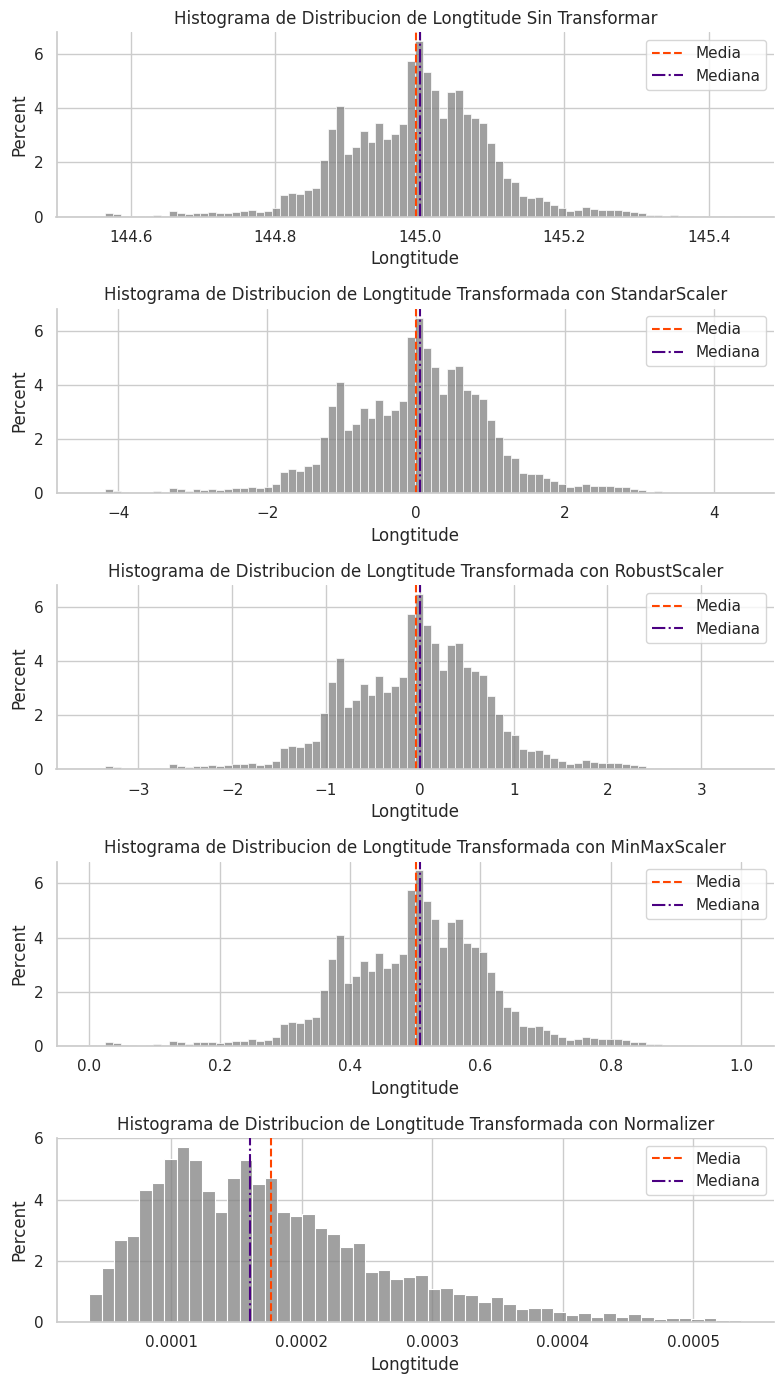

In [95]:
# @title Podemos realizar histogramas, comparando las distribuciones obtenidas luego de las dintintas Transformaciones:

plt.figure(figsize=(8, 5))
# Filter DataFrame for specific programming languages
Categoria = "Longtitude" #@param ['Rooms', 'Price', 'Distance','Postcode', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']

## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=5, figsize=(8, 14))

sns.histplot(melb_df_2[Categoria], bins = "auto", ax=axes[0], color='gray',  stat = "percent")
axes[0].axvline(melb_df_2[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(melb_df_2[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].set_title('Histograma de Distribucion de {} Sin Transformar'.format(Categoria))
axes[0].legend(loc='upper right')  # Add legend box at upper right corner

sns.histplot(df_StandarScaler[Categoria], bins = "auto", ax=axes[1], color='gray',  stat = "percent")
axes[1].axvline(df_StandarScaler[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(df_StandarScaler[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[1].set_title('Histograma de Distribucion de {} Transformada con StandarScaler'.format(Categoria))
axes[1].legend(loc='upper right')  # Add legend box at upper right corner

sns.histplot(df_RobustScaler[Categoria], bins = "auto", ax=axes[2], color='gray',  stat = "percent")
axes[2].axvline(df_RobustScaler[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df_RobustScaler[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[2].set_title('Histograma de Distribucion de {} Transformada con RobustScaler'.format(Categoria))
axes[2].legend(loc='upper right')  # Add legend box at upper right corner

sns.histplot(df_MinMaxScaler[Categoria], bins = "auto", ax=axes[3], color='gray',  stat = "percent")
axes[3].axvline(df_MinMaxScaler[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[3].axvline(df_MinMaxScaler[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[3].set_title('Histograma de Distribucion de {} Transformada con MinMaxScaler'.format(Categoria))
axes[3].legend(loc='upper right')  # Add legend box at upper right corner

sns.histplot(df_Normalizer[Categoria], bins = "auto", ax=axes[4], color='gray',  stat = "percent")
axes[4].axvline(df_Normalizer[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[4].axvline(df_Normalizer[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[4].set_title('Histograma de Distribucion de {} Transformada con Normalizer'.format(Categoria))
axes[4].legend(loc='upper right')  # Add legend box at upper right corner

#axes[0].legend()

sns.despine()
plt.subplots_adjust(hspace=0.8)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()




# Realizamos un análisis estadistico del resultado de estas Transformaciones

In [ ]:
#@title Standar
df_scaled1.describe()


Rooms         Price      Distance      Bedroom2      Bathroom  \
count  1.310000e+04  1.310000e+04  1.310000e+04  1.310000e+04  1.310000e+04   
mean  -2.429948e-16  1.735677e-16  2.082812e-16  2.082812e-16  1.692285e-16   
std    1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00  1.000038e+00   
min   -2.080817e+00 -1.371506e+00 -1.574470e+00 -2.079127e+00 -8.044363e-01   
25%   -1.006032e+00 -7.127146e-01 -6.937869e-01 -9.921429e-01 -8.044363e-01   
50%    6.875342e-02 -2.706309e-01 -1.433602e-01  9.484146e-02 -8.044363e-01   
75%    6.875342e-02  4.575069e-01  5.354993e-01  9.484146e-02  7.346488e-01   
max    5.442678e+00  4.921685e+00  4.920565e+00  3.355795e+00  3.812819e+00   

                Car      Landsize  Propertycount  
count  1.310000e+04  1.310000e+04   1.310000e+04  
mean   1.388542e-16 -4.339192e-17  -1.193278e-16  
std    1.000038e+00  1.000038e+00   1.000038e+00  
min   -1.737813e+00 -1.084412e+00  -1.611038e+00  
25%   -6.521461e-01 -6.601089e-01  -6.969534e-01  
50%    4.335209e-01 -4.987569e-02  -2.015474e-01  
75%    4.335209e-01  4.650086e-01   6.660430e-01  
max    4.776189e+00  1.006903e+01   3.258508e+00

In [ ]:
#@title Robust
df_scaled2.describe()

Rooms         Price      Distance      Bedroom2      Bathroom  \
count  13100.000000  13100.000000  13100.000000  13100.000000  13100.000000   
mean      -0.063969      0.231265      0.116621     -0.087252      0.522672   
std        0.930454      0.854572      0.813511      0.920012      0.649761   
min       -2.000000     -0.940741     -1.164179     -2.000000      0.000000   
25%       -1.000000     -0.377778     -0.447761     -1.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.622222      0.552239      0.000000      1.000000   
max        5.000000      4.437037      4.119403      3.000000      3.000000   

                Car      Landsize  Propertycount  
count  13100.000000  13100.000000   13100.000000  
mean      -0.399313      0.044329       0.147871  
std        0.921128      0.888830       0.733706  
min       -2.000000     -0.919492      -1.034112  
25%       -1.000000     -0.542373      -0.363468  
50%        0.000000      0.000000       0.000000  
75%        0.000000      0.457627       0.636532  
max        4.000000      8.993644       2.538565

In [ ]:
#@title MinMaxScaler
df_scaled3.describe()

Rooms         Price      Distance      Bedroom2      Bathroom  \
count  13100.000000  13100.000000  13100.000000  13100.000000  13100.000000   
mean       0.276576      0.217935      0.242411      0.382550      0.174224   
std        0.132922      0.158908      0.153970      0.184002      0.216587   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.142857      0.104683      0.135593      0.200000      0.000000   
50%        0.285714      0.174931      0.220339      0.400000      0.000000   
75%        0.285714      0.290634      0.324859      0.400000      0.333333   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                Car      Landsize  Propertycount  
count  13100.000000  13100.000000   13100.000000  
mean       0.266781      0.097227       0.330840  
std        0.153521      0.089662       0.205366  
min        0.000000      0.000000       0.000000  
25%        0.166667      0.038042       0.187715  
50%        0.333333      0.092755       0.289450  
75%        0.333333      0.138919       0.467617  
max        1.000000      1.000000       1.000000

In [ ]:
#@title Normalizer
df_scaled4.describe()

Rooms         Price      Distance      Bedroom2      Bathroom  \
count  1.310000e+04  13100.000000  1.310000e+04  1.310000e+04  1.310000e+04   
mean   3.251383e-06      0.999922  1.264378e-05  3.233559e-06  1.690691e-06   
std    1.388358e-06      0.000179  1.071177e-05  1.396231e-06  8.307913e-07   
min    4.081622e-07      0.996801  4.261362e-07  4.081622e-07  2.631578e-07   
25%    2.238786e-06      0.999932  5.381774e-06  2.222118e-06  1.081079e-06   
50%    3.029974e-06      0.999979  9.845978e-06  2.999996e-06  1.509420e-06   
75%    3.999892e-06      0.999992  1.657410e-05  3.999153e-06  2.150528e-06   
max    1.408243e-05      1.000000  1.120050e-04  1.408243e-05  8.246617e-06   

                Car      Landsize  Propertycount  
count  13100.000000  13100.000000   13100.000000  
mean       0.000002      0.000507       0.009225  
std        0.000001      0.000695       0.008419  
min        0.000000      0.000000       0.000128  
25%        0.000001      0.000177       0.003900  
50%        0.000002      0.000363       0.006492  
75%        0.000002      0.000643       0.011630  
max        0.000014      0.013662       0.079929

##Tras analizar los gráficos y la información estadística recomendariamos Standard o Robust Scaler

##Una vez analizada la base de datos, y prefiltrada podemos trabajar con la consigna planteada, quedan de respaldo los Data Frames Estandarizados, crearemos una copia del Dataframe para seguir trabajando.
Filtrado y Estandarización
Se estandarizaron todas las columnas menos "BuildingArea" y "Yearbuilt" cuyos valores faltantes serán posteriormente imputados y posteriormente Estandarizados.




# ## Ejercicio 1: Encoding
Trabajaremos con la base de datos de `df_StandarScaler` presentada a continuación.


1. Seleccionar todas las filas y columnas del conjunto de datos, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pd.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.




In [10]:
#@markdown Hago una copia del DataFrame para trabajar en la Segunda parte y guadar un respaldo.
#@markdown Además en este punto podemos seleccionar los DataFrames obtenidos con las distintas metodologías de Transformación y repettir los procedimientos
#@ Finalmente, renombro las columnas, agregando el término "ST" a los nombres, para indicar que están estandarizados
melb_df_ST = df_RobustScaler.copy()
##ST_column_names = [col + 'ST' for col in Important_var_col]
ST_column_names = {col: col + 'ST' for col in Important_var_col}

# Step 4: Assign the new column names to the DataFrame
melb_df_ST.rename(columns=ST_column_names, inplace=True)
melb_df_ST.info()
df_RobustScaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RoomsST          13100 non-null  float64
 1   PriceST          13100 non-null  float64
 2   DistanceST       13100 non-null  float64
 3   PostcodeST       13100 non-null  float64
 4   Bedroom2ST       13100 non-null  float64
 5   BathroomST       13100 non-null  float64
 6   CarST            13100 non-null  float64
 7   LandsizeST       13100 non-null  float64
 8   LattitudeST      13100 non-null  float64
 9   LongtitudeST     13100 non-null  float64
 10  PropertycountST  13100 non-null  float64
 11  Suburb           13100 non-null  object 
 12  Address          13100 non-null  object 
 13  Type             13100 non-null  object 
 14  Method           13100 non-null  object 
 15  SellerG          13100 non-null  object 
 16  Date             13100 non-null  object 
 17  BuildingArea

1. Seleccionar todas las filas y columnas del conjunto de datos, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.




In [11]:
melb_df_ST.describe()

RoomsST       PriceST    DistanceST    PostcodeST    Bedroom2ST  \
count  13100.000000  13100.000000  13100.000000  13100.000000  13100.000000   
mean      -0.063969      0.231265      0.116621      0.193209     -0.087252   
std        0.930454      0.854572      0.813511      0.837751      0.920012   
min       -2.000000     -0.940741     -1.164179     -0.815534     -2.000000   
25%       -1.000000     -0.377778     -0.447761     -0.388350     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.622222      0.552239      0.611650      0.000000   
max        5.000000      4.437037      4.119403      8.669903      3.000000   

         BathroomST         CarST    LandsizeST   LattitudeST  LongtitudeST  \
count  13100.000000  13100.000000  13100.000000  13100.000000  13100.000000   
mean       0.522672     -0.399313      0.044329     -0.066620     -0.041517   
std        0.649761      0.921128      0.888830      0.753446      0.793182   
min        0.000000     -2.000000     -0.919492     -3.186905     -3.525023   
25%        0.000000     -1.000000     -0.542373     -0.547569     -0.553241   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.457627      0.452431      0.446759   
max        3.000000      4.000000      8.993644      2.843372      3.427010   

       PropertycountST  BuildingArea    YearBuilt  
count     13100.000000   6888.000000  7922.000000  
mean          0.147871    144.726403  1964.580283  
std           0.733706    128.542171    37.113095  
min          -1.034112      0.000000  1196.000000  
25%          -0.363468     93.000000  1940.000000  
50%           0.000000    126.000000  1970.000000  
75%           0.636532    172.000000  1999.000000  
max           2.538565   6791.000000  2018.000000

# Columnas del data frame
Lo primero que haremos es ver cuales son todas las columnas de nuestro data frame, para luego poder quedarnos con todas menos con "BuildingArea" y "YearBuilt", como pide la consigna.

In [12]:

melb_df_ST.columns

Index(['RoomsST', 'PriceST', 'DistanceST', 'PostcodeST', 'Bedroom2ST',
       'BathroomST', 'CarST', 'LandsizeST', 'LattitudeST', 'LongtitudeST',
       'PropertycountST', 'Suburb', 'Address', 'Type', 'Method', 'SellerG',
       'Date', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'],
      dtype='object')

In [13]:
#@markdown Aquí obtengo información sobre el número de elementos de cada columna y el tipo de datos presente en cada columna
melb_df_ST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RoomsST          13100 non-null  float64
 1   PriceST          13100 non-null  float64
 2   DistanceST       13100 non-null  float64
 3   PostcodeST       13100 non-null  float64
 4   Bedroom2ST       13100 non-null  float64
 5   BathroomST       13100 non-null  float64
 6   CarST            13100 non-null  float64
 7   LandsizeST       13100 non-null  float64
 8   LattitudeST      13100 non-null  float64
 9   LongtitudeST     13100 non-null  float64
 10  PropertycountST  13100 non-null  float64
 11  Suburb           13100 non-null  object 
 12  Address          13100 non-null  object 
 13  Type             13100 non-null  object 
 14  Method           13100 non-null  object 
 15  SellerG          13100 non-null  object 
 16  Date             13100 non-null  object 
 17  BuildingArea

Vemos para el próximo paso de encoding de contamos con las siguientes variables categóricas:

Suburb

Adress

Type

Method

SellerG

Date

CouncilArea

RegionName


In [14]:
categoric_var = ['Suburb', 'Address','Type', 'Method', 'SellerG',
       'Date','CouncilArea', 'Regionname']
melb_categoric_var = melb_df_ST[categoric_var]

In [15]:
melb_categoric_var.sample(10)

Suburb            Address Type Method   SellerG        Date  \
11133         Reservoir    66 Crookston Rd    h      S       Ray  15/07/2017   
9570             Dallas      17 Hampden St    h      S     Raine  24/06/2017   
10044  Hoppers Crossing      48 Branton Rd    h      S   Triwest  27/05/2017   
9270          Footscray  18/55 Moreland St    u      S       Jas  17/06/2017   
2653          Footscray   49 MacPherson St    h      S   Sweeney  22/08/2016   
4624     Port Melbourne        106 Ross St    h     VB  Marshall   7/05/2016   
1945             Coburg    1 Shaftsbury St    h     SP  Grantham  24/09/2016   
10171           Preston       105 Gower St    h      S   McGrath  27/05/2017   
11084      Melton South       23 Neerim St    h      S     Raine  15/07/2017   
8807     Brunswick West     60 Shamrock St    h      S    Jellis   3/06/2017   

       CouncilArea             Regionname  
11133      Darebin  Northern Metropolitan  
9570          Hume  Northern Metropolitan  
10044      Wyndham   Western Metropolitan  
9270   Maribyrnong   Western Metropolitan  
2653   Maribyrnong   Western Metropolitan  
4624     Melbourne  Southern Metropolitan  
1945      Moreland  Northern Metropolitan  
10171      Darebin  Northern Metropolitan  
11084       Melton       Western Victoria  
8807      Moreland  Northern Metropolitan

Podemos tener una descripción de los valores en las variables categírcas del Data Frame


In [16]:
#@markdown Aquí obtengo información sobre el número de datos diferentes en cada columna.
#@markdown Me informa la cantidad de columnas que puedo tener de cada Variable categórica al hacer encoding.
#@markdown Por ejemplo en Type obtendría 3 columnas tras hacer el OneHotEncoding

for categoricas in melb_categoric_var.columns:
  unique_values = melb_categoric_var[categoricas].nunique()
  print(f'Valores Unicos en las variable categoric {categoricas}: {unique_values}')

Valores Unicos en las variable categoric Suburb: 298
Valores Unicos en las variable categoric Address: 12911
Valores Unicos en las variable categoric Type: 3
Valores Unicos en las variable categoric Method: 5
Valores Unicos en las variable categoric SellerG: 258
Valores Unicos en las variable categoric Date: 58
Valores Unicos en las variable categoric CouncilArea: 31
Valores Unicos en las variable categoric Regionname: 8


De esta lista:

Suburb: region

Address: property address

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Regionname: General Region (West, North West, North, North east …etc)

CouncilArea: Governing council for the area

Descartaremos:

<font color ="red"> SellerG : Muchos valores, e información nmo necesaria para el análisis.

<font color ="red"> Date sold: Muchos valores únicos, no práctico para el encoding

<font color ="red"> Address: Valores únicos

<font color ="red"> Method: Información no necsaria para el posterior análisis

<font color ="Red"> **Suburb** . Muchísimos Valores

Retendremos para el Encoding las siguientes variables:


<font color ="Blue"> **Type**

<font color ="Blue"> **Regionname**

<font color ="Blue"> **CouncilArea**


In [17]:
InterestingCols_categories = ['Type','CouncilArea', 'Regionname']

#renombramos el data frame para no modificar el original
melbcopia_categories_df = melb_categoric_var[InterestingCols_categories]
melbcopia_categories_df.sample(5)

Type CouncilArea             Regionname
747     h   Glen Eira  Southern Metropolitan
884     u   Glen Eira  Southern Metropolitan
5545    u   Melbourne  Southern Metropolitan
3020    h     Bayside  Southern Metropolitan
7570    h       Yarra  Northern Metropolitan

# Previo a la selección de estas 3 variables, analicemos un poco su contenido.
En primer lugar realizaremos un histograma contando cuántas veces se repiten las distintas variables categóricas

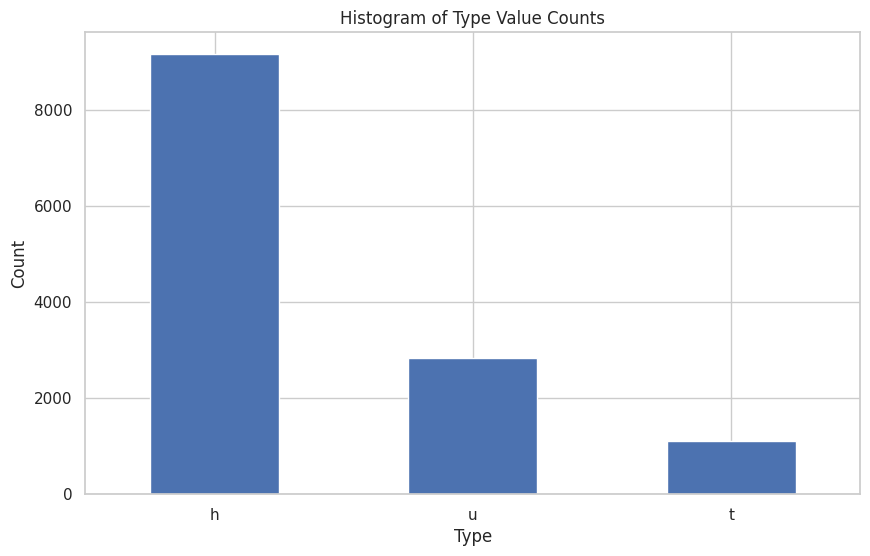

In [18]:
#@title COLUMNA Type
Regionname_counts = melbcopia_categories_df.Type.value_counts()
# Creamos el histograma a partir de los conteos
plt.figure(figsize=(10, 6))
Regionname_counts.plot(kind='bar')

# Añadir etiquetas y título
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Histogram of Type Value Counts')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el histograma
plt.show()

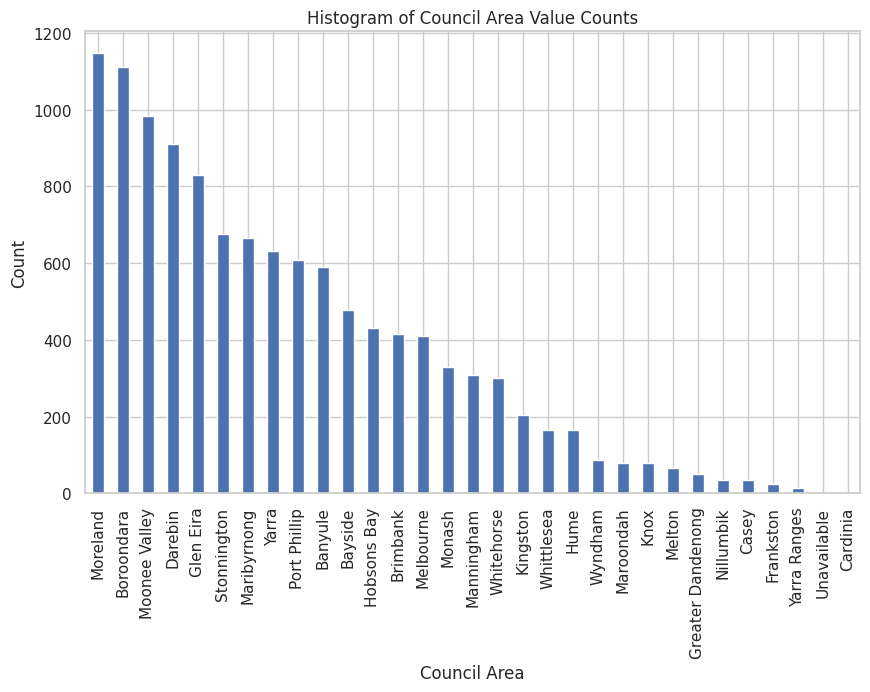

In [19]:
#@title COLUMNA COUNCILAREA
Councilarea_counts = melbcopia_categories_df.CouncilArea.value_counts()
# Creamos el histograma a partir de los conteos
plt.figure(figsize=(10, 6))
Councilarea_counts.plot(kind='bar')

# Añadir etiquetas y título
plt.xlabel('Council Area')
plt.ylabel('Count')
plt.title('Histogram of Council Area Value Counts')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el histograma
plt.show()

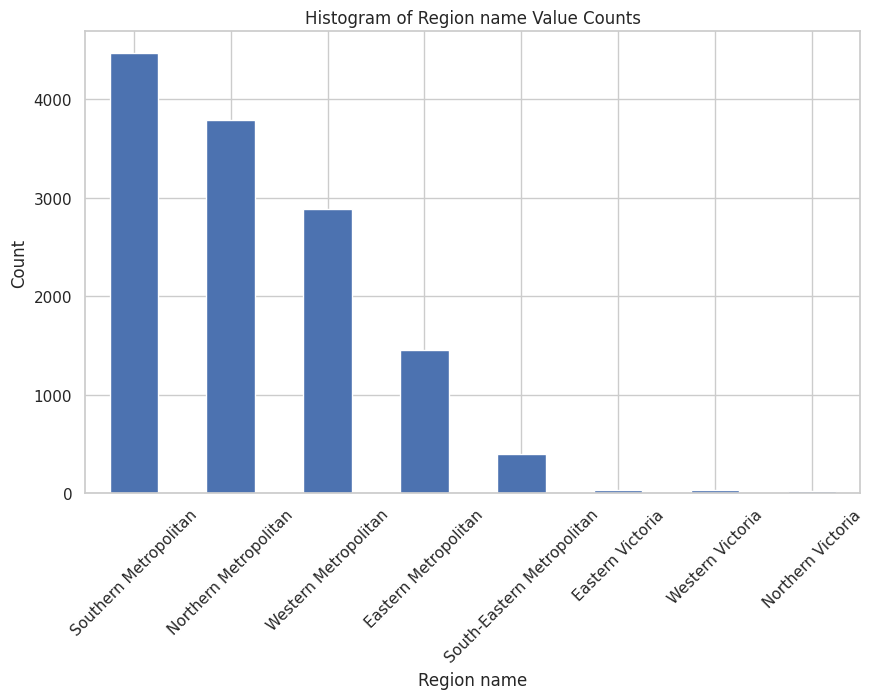

In [20]:
#@title COLUMNA Regionname
Regionname_counts = melbcopia_categories_df.Regionname.value_counts()
# Creamos el histograma a partir de los conteos
plt.figure(figsize=(10, 6))
Regionname_counts.plot(kind='bar')

# Añadir etiquetas y título
plt.xlabel('Region name')
plt.ylabel('Count')
plt.title('Histogram of Region name Value Counts')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el histograma
plt.show()

# 2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


# Vamos por pasos para realizar el Encoding
#1) Quedaron seleccionadas las variables categóricas a trabajar:

In [21]:
#@title Paso 1 Variables a Trabajar 'Type', 'CouncilArea', 'Regionname'
#InterestingCols_categories = ['Suburb', 'Type', 'CouncilArea', 'Regionname']

#renombramos el data frame para no modificar el original
#melbcopia_categories_df = melbcopia_categories_df[InterestingCols_categories]
#melbcopia_categories_df.sample(5)

In [25]:
#@markdown Creamos las variables binarias con get_dummies y lo hacemos para todas las columnas
melb_dummies_df = pd.get_dummies(melbcopia_categories_df, drop_first = True) #el drop_first = True es para que elimine las columnas originales con las variables categoricas.

melb_dummies_df.sample(5)

Type_t  Type_u  CouncilArea_Bayside  CouncilArea_Boroondara  \
9603   False   False                False                   False   
789    False    True                False                   False   
4267   False    True                False                   False   
8773   False   False                False                   False   
8100   False   False                False                   False   

      CouncilArea_Brimbank  CouncilArea_Cardinia  CouncilArea_Casey  \
9603                 False                 False              False   
789                  False                 False              False   
4267                 False                 False              False   
8773                 False                 False              False   
8100                 False                 False              False   

      CouncilArea_Darebin  CouncilArea_Frankston  CouncilArea_Glen Eira  ...  \
9603                False                  False                  False  ...   
789                 False                  False                   True  ...   
4267                False                  False                  False  ...   
8773                False                  False                   True  ...   
8100                False                  False                  False  ...   

      CouncilArea_Wyndham  CouncilArea_Yarra  CouncilArea_Yarra Ranges  \
9603                False              False                     False   
789                 False              False                     False   
4267                False              False                     False   
8773                False              False                     False   
8100                False               True                     False   

      Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
9603                        False                             False   
789                         False                             False   
4267                        False                              True   
8773                        False                             False   
8100                        False                              True   

      Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
9603                         False                                  False   
789                          False                                  False   
4267                         False                                  False   
8773                         False                                  False   
8100                         False                                  False   

      Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
9603                              True                            False   
789                               True                            False   
4267                             False                            False   
8773                              True                            False   
8100                             False                            False   

      Regionname_Western Victoria  
9603                        False  
789                         False  
4267                        False  
8773                        False  
8100                        False  

[5 rows x 39 columns]

*Ahora* debemos concatenar las variables categoricas codificadas con las columnas de variables númericas de nuestro data frame (melbcopia_df). Como debemos utilizar numpy.hstack, debemos convertir cada data frame en un array de numpy, para ello hay que asegurarse que ambos data frame tengan el mismo número de filas.

In [22]:
#@markdown Defino las Variables Numericas

numerical_var = melb_df_ST.select_dtypes(include=[np.number]).columns.tolist()

# Step 4: Print the names of the numerical columns
print(numerical_var)

melb_numerical_var = melb_df_ST[numerical_var]
melb_numerical_var.info()

['RoomsST', 'PriceST', 'DistanceST', 'PostcodeST', 'Bedroom2ST', 'BathroomST', 'CarST', 'LandsizeST', 'LattitudeST', 'LongtitudeST', 'PropertycountST', 'BuildingArea', 'YearBuilt']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RoomsST          13100 non-null  float64
 1   PriceST          13100 non-null  float64
 2   DistanceST       13100 non-null  float64
 3   PostcodeST       13100 non-null  float64
 4   Bedroom2ST       13100 non-null  float64
 5   BathroomST       13100 non-null  float64
 6   CarST            13100 non-null  float64
 7   LandsizeST       13100 non-null  float64
 8   LattitudeST      13100 non-null  float64
 9   LongtitudeST     13100 non-null  float64
 10  PropertycountST  13100 non-null  float64
 11  BuildingArea     6888 non-null   float64
 12  YearBuilt        7922 non-null   float64
dtypes: float64(13)


In [23]:
melb_numerical_var.describe()

RoomsST       PriceST    DistanceST    PostcodeST    Bedroom2ST  \
count  13100.000000  13100.000000  13100.000000  13100.000000  13100.000000   
mean      -0.063969      0.231265      0.116621      0.193209     -0.087252   
std        0.930454      0.854572      0.813511      0.837751      0.920012   
min       -2.000000     -0.940741     -1.164179     -0.815534     -2.000000   
25%       -1.000000     -0.377778     -0.447761     -0.388350     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.622222      0.552239      0.611650      0.000000   
max        5.000000      4.437037      4.119403      8.669903      3.000000   

         BathroomST         CarST    LandsizeST   LattitudeST  LongtitudeST  \
count  13100.000000  13100.000000  13100.000000  13100.000000  13100.000000   
mean       0.522672     -0.399313      0.044329     -0.066620     -0.041517   
std        0.649761      0.921128      0.888830      0.753446      0.793182   
min        0.000000     -2.000000     -0.919492     -3.186905     -3.525023   
25%        0.000000     -1.000000     -0.542373     -0.547569     -0.553241   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.457627      0.452431      0.446759   
max        3.000000      4.000000      8.993644      2.843372      3.427010   

       PropertycountST  BuildingArea    YearBuilt  
count     13100.000000   6888.000000  7922.000000  
mean          0.147871    144.726403  1964.580283  
std           0.733706    128.542171    37.113095  
min          -1.034112      0.000000  1196.000000  
25%          -0.363468     93.000000  1940.000000  
50%           0.000000    126.000000  1970.000000  
75%           0.636532    172.000000  1999.000000  
max           2.538565   6791.000000  2018.000000

Ahora debemos concatenar las variables categoricas codificadas con las columnas de variables númericas de nuestra data frame (melb_numerical_var). Como debemos utilizar numpy.hstack, debemos convertir cada data frame en un array de numpy, para ello hay que asegurarse que ambos data frame tengan el mismo número de filas.

In [26]:
print ( " filas x columnas data frame 1 =", melb_numerical_var.shape, " filas x columnas data frame 2 =", melb_dummies_df.shape)

 filas x columnas data frame 1 = (13100, 13)  filas x columnas data frame 2 = (13100, 39)


In [29]:
#Convertimos en array los dataframe:
array_melbnumerical = melb_numerical_var.values
array_melb_dummies = melb_dummies_df.values

In [30]:
#Contatenamos con np.hstack
concatenated_array_melb = np.hstack((array_melbnumerical, array_melb_dummies))
concatenated_array_melb_df = pd.DataFrame(concatenated_array_melb)
concatenated_array_melb_df.sample(10)

0         1         2         3    4    5    6         7         8   \
3313   2.0  1.222222 -0.208955 -0.048544  1.0  1.0  0.0  0.540254  0.413538   
3829   2.0  0.362963 -0.089552 -0.504854  2.0  2.0  0.0  0.025424  0.294400   
10879  1.0 -0.592593  1.358209 -0.533981  1.0  1.0  0.0  0.135593 -0.409305   
8881   1.0 -0.377778  1.537313 -0.077670  1.0  1.0  0.0  0.074153  1.735877   
5205  -1.0 -0.555556 -1.000000  0.359223 -1.0  0.0 -1.0 -0.919492 -0.221538   
9537   0.0 -0.318519  0.417910 -0.009709  0.0  0.0  0.0  0.167373  1.039951   
1629  -1.0  1.214815 -0.910448 -0.291262 -1.0  0.0 -1.0 -0.474576  0.164431   
11953  1.0 -0.281481  1.044776 -0.087379  1.0  1.0  0.0  0.139831  1.395594   
8905   1.0 -0.229630  0.283582 -0.368932  1.0  1.0  1.0  0.476695  0.934498   
6258   0.0 -0.451852  0.835821  0.029126  0.0  0.0 -1.0  0.362288  0.832000   

             9   ...   42   43   44   45   46   47   48   49   50   51  
3313   0.306437  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3829  -0.953957  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
10879 -2.664998  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
8881   0.077918  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
5205   0.067755  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
9537   0.566446  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1629  -0.217123  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
11953 -0.026948  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
8905  -0.546966  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
6258   0.642901  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 52 columns]

Vemos que haciendolo de esta forma obtenemos un data frame sin nombres de columna por lo que identificar las variables sería un incoveniente. Vamos a realizar el mismo proceso de concatenación pero ahora utilizando de Sklearn.preprocessing y la funcion OneHotEncoder. (get_dummies es solo para panda, encambio OneHotEnconder trabaja con arrays como data frames y transforma variables categoricas en vectores onehot)

In [137]:
from sklearn.preprocessing import OneHotEncoder
#Recordemos que la variable con las columnas categoricas del melbcopia_categories_df se llama
InterestingCols_categories
#la variable con las columnas del  melb_numerical_var se llama
numerical_var #No contiene las categoricas tmb

#En el enunciado dice: aplicar Onehotencoder a variables categoricas

# Configuramos el OneHotEncoder
enc = OneHotEncoder(categories='auto', sparse=False)

# Aplicar el OneHotEncoder a las columnas categóricas
encoded_categorical_data = enc.fit_transform(melbcopia_categories_df) #es un array

#Recordemos que tenemos el array del data frame melbcopia_df que se llama
array_melbnumerical

# Concatenar los datos codificados con los datos numéricos
combined_data = np.hstack((encoded_categorical_data, array_melbnumerical)) #tiene como argumento arrays

# Obtener los nombres de las columnas codificadas
encoded_columns = enc.get_feature_names_out(InterestingCols_categories)

# Crear el nuevo DataFrame
melb_OneHot_df = pd.DataFrame(combined_data, columns=np.append(encoded_columns, numerical_var))
#El data frame que obtuve acá tiene una fila mas que el que hice con dummies y no se pq
melb_OneHot_df.info()
melb_OneHot_df.sample(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_h                                 13100 non-null  float64
 1   Type_t                                 13100 non-null  float64
 2   Type_u                                 13100 non-null  float64
 3   CouncilArea_Banyule                    13100 non-null  float64
 4   CouncilArea_Bayside                    13100 non-null  float64
 5   CouncilArea_Boroondara                 13100 non-null  float64
 6   CouncilArea_Brimbank                   13100 non-null  float64
 7   CouncilArea_Cardinia                   13100 non-null  float64
 8   CouncilArea_Casey                      13100 non-null  float64
 9   CouncilArea_Darebin                    13100 non-null  float64
 10  CouncilArea_Frankston                  13100 non-null  float64
 11  Co

Type_h  Type_t  Type_u  CouncilArea_Banyule  CouncilArea_Bayside  \
28        0.0     0.0     1.0                  0.0                  0.0   
5023      0.0     0.0     1.0                  0.0                  0.0   
12306     1.0     0.0     0.0                  0.0                  0.0   
7282      0.0     0.0     1.0                  0.0                  0.0   
7176      1.0     0.0     0.0                  0.0                  0.0   

       CouncilArea_Boroondara  CouncilArea_Brimbank  CouncilArea_Cardinia  \
28                        0.0                   0.0                   0.0   
5023                      0.0                   0.0                   0.0   
12306                     0.0                   0.0                   0.0   
7282                      1.0                   0.0                   0.0   
7176                      0.0                   0.0                   0.0   

       CouncilArea_Casey  CouncilArea_Darebin  ...  PostcodeST  Bedroom2ST  \
28                   0.0                  0.0  ...   -0.165049        -2.0   
5023                 0.0                  1.0  ...   -0.106796        -1.0   
12306                0.0                  0.0  ...    0.456311         1.0   
7282                 0.0                  0.0  ...    0.194175         0.0   
7176                 0.0                  0.0  ...   -0.669903         0.0   

       BathroomST  CarST  LandsizeST  LattitudeST  LongtitudeST  \
28            0.0   -1.0   -0.919492    -0.065969     -0.028488   
5023          0.0    0.0   -0.639831     0.906831      0.167077   
12306         1.0    1.0    0.324153    -0.398178      1.354019   
7282          0.0   -1.0   -0.177966     0.146708      0.567447   
7176          0.0    3.0    0.497881    -0.305231     -0.974746   

       PropertycountST  BuildingArea  YearBuilt  
28           -0.424130          50.0        NaN  
5023          2.538565          83.0     1980.0  
12306        -0.362628           NaN        NaN  
7282          0.212737         120.0     1950.0  
7176         -0.934129         124.0     1950.0  

[5 rows x 56 columns]

## *El DataFrame 'melb_OneHot_df' Contiene las variables numéricas,restan YearBuilt y BuildingArea *

In [32]:
#dimensiones del DataFrame con variables categóricas codificadas:
print("Dimensiones del DataFrame con variables categóricas codificadas", encoded_categorical_data.shape)
#dimensiones del DataFrame con variables numéricas:
print("Dimensiones del DataFrame con variables numéricas:", array_melbnumerical.shape)
#dimensiones del DataFrame con ambas variables:
print( "Dimensiones del DataFrame con ambas variables:", melb_OneHot_df.shape)
#print(concatenated_array_melb.shape)

Dimensiones del DataFrame con variables categóricas codificadas (13100, 43)
Dimensiones del DataFrame con variables numéricas: (13100, 13)
Dimensiones del DataFrame con ambas variables: (13100, 56)


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

A continuación concatenamos el data frame codificado con las columnas BuildingArea y YearBuilt.

In [33]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

# melb_data_mice es el data frame para trabajar en este punto hermos una copia
melb_data_mice = melb_OneHot_df.copy()

#Belen: acá no entiendo pq en esta visualizacion me aparecen NaN que no veo si exploro la matriz (?)
#Lupe y Belu: no entendemos tu duda. A qué te referis con explorar la matriz?

#Vemos la cantidad de datos faltantes (NaN)
#columna = "BuildingArea"
nan_count = melb_data_mice.isna().sum() #cuento NaN de una columna de interes
nan_count

Type_h                                      0
Type_t                                      0
Type_u                                      0
CouncilArea_Banyule                         0
CouncilArea_Bayside                         0
CouncilArea_Boroondara                      0
CouncilArea_Brimbank                        0
CouncilArea_Cardinia                        0
CouncilArea_Casey                           0
CouncilArea_Darebin                         0
CouncilArea_Frankston                       0
CouncilArea_Glen Eira                       0
CouncilArea_Greater Dandenong               0
CouncilArea_Hobsons Bay                     0
CouncilArea_Hume                            0
CouncilArea_Kingston                        0
CouncilArea_Knox                            0
CouncilArea_Manningham                      0
CouncilArea_Maribyrnong                     0
CouncilArea_Maroondah                       0
CouncilArea_Melbourne                       0
CouncilArea_Melton                

Vemos el porcentaje de datos faltantes en las nuevas columnas agregadas al data frame codificado (BuildingArea y YearBuilt)

In [34]:
# Que cantidad de datos faltantes tenemos?

#suma de todos lo datos faltantes
celdas_totales_BA = melb_data_mice["BuildingArea"].size
faltantes_totales_BA = melb_data_mice["BuildingArea"].isna().sum()

celdas_totales_YB = melb_data_mice["YearBuilt"].size
faltantes_totales_YB = melb_data_mice["YearBuilt"].isna().sum()

#Porcentaje de datos faltantes de la columna BuildingArea
porcentaje_faltante_BA = (faltantes_totales_BA/celdas_totales_BA) * 100
print( f"{porcentaje_faltante_BA :.2f}% de la columna BuildingArea de datos son datos faltantes.")
#Porcentaje de datos faltantes de la columna YearBuilt
porcentaje_faltante_YB = (faltantes_totales_YB/celdas_totales_YB) * 100
print( f"{porcentaje_faltante_YB :.2f}% de la columna YearBuilt de datos son datos faltantes.")

47.42% de la columna BuildingArea de datos son datos faltantes.
39.53% de la columna YearBuilt de datos son datos faltantes.


# Graficos mostrando la distribución de cada variable (BuildingArea y YearBuilt) antes de ser imputada

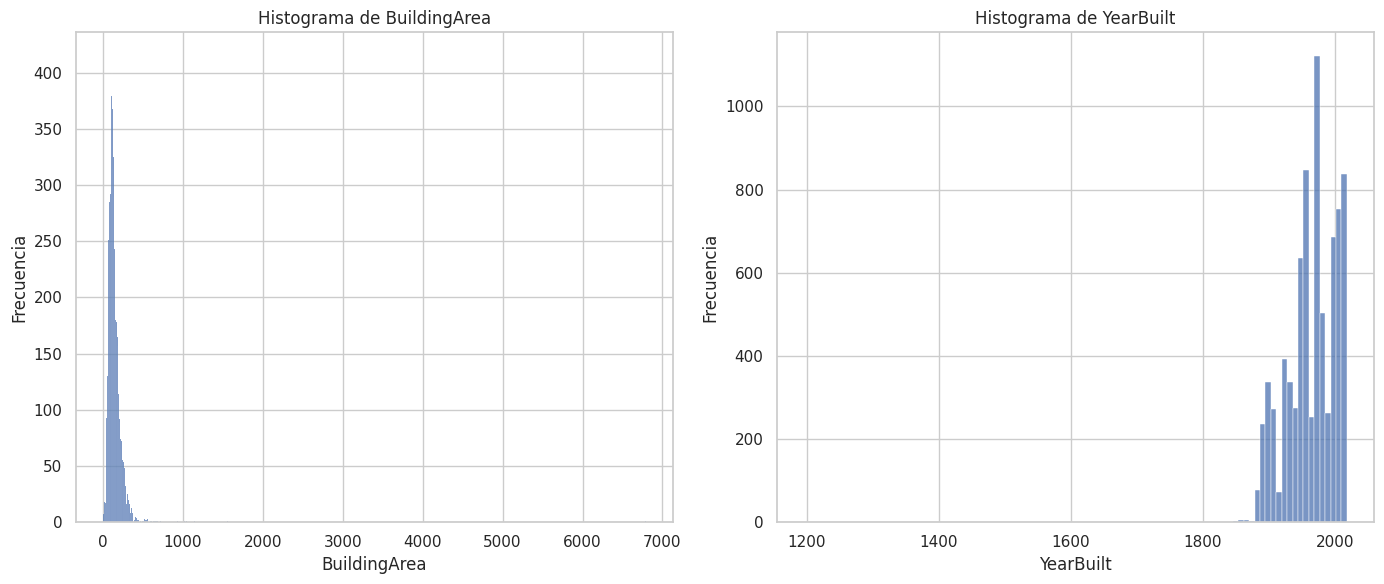

In [35]:
# @title
sns.set_theme(style="whitegrid")


# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_mice['BuildingArea'].dropna(), bins=1000, kde=False, ax=axes[0])
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
#axes[0].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt

# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_mice['YearBuilt'].dropna(), bins=100, kde=False, ax=axes[1])
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
#axes[1].set_xlim(q01YB, q99YB)  # Establecer límites entre percentilplt

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

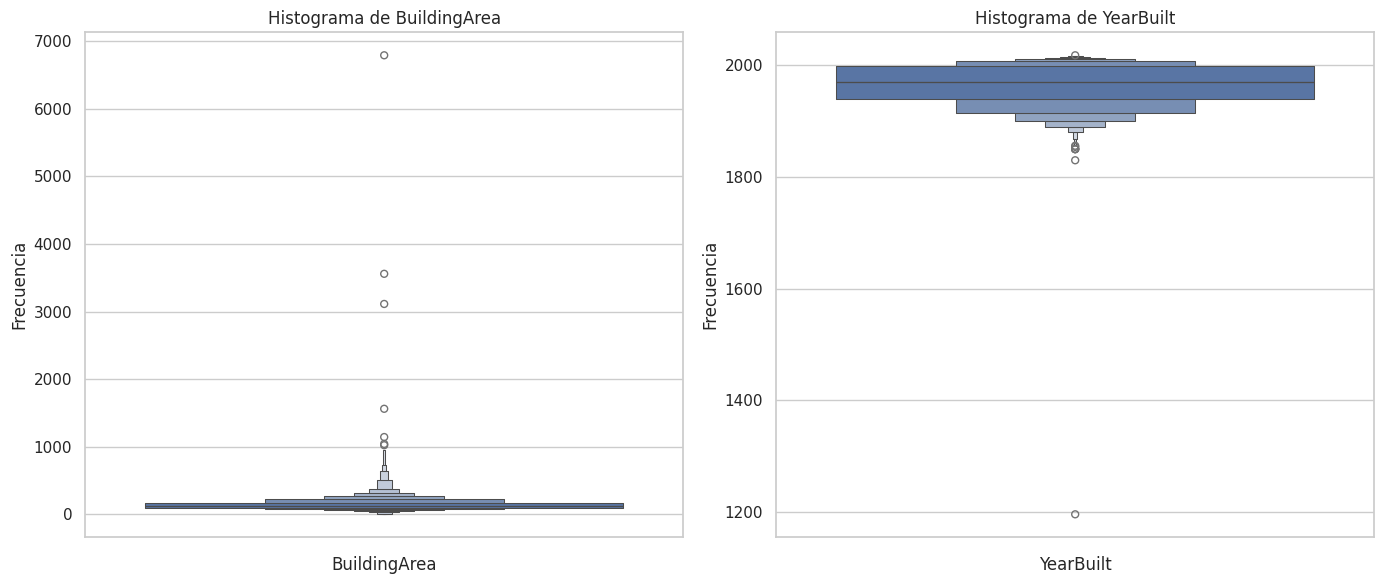

In [36]:
# @title
sns.set_theme(style="whitegrid")


# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.boxenplot(melb_data_mice['BuildingArea'].dropna(),  ax=axes[0])
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
#axes[0].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt

# Crear el segundo histograma en el segundo subplot
sns.boxenplot(melb_data_mice['YearBuilt'].dropna(),  ax=axes[1])
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
#axes[1].set_xlim(q01YB, q99YB)  # Establecer límites entre percentilplt

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

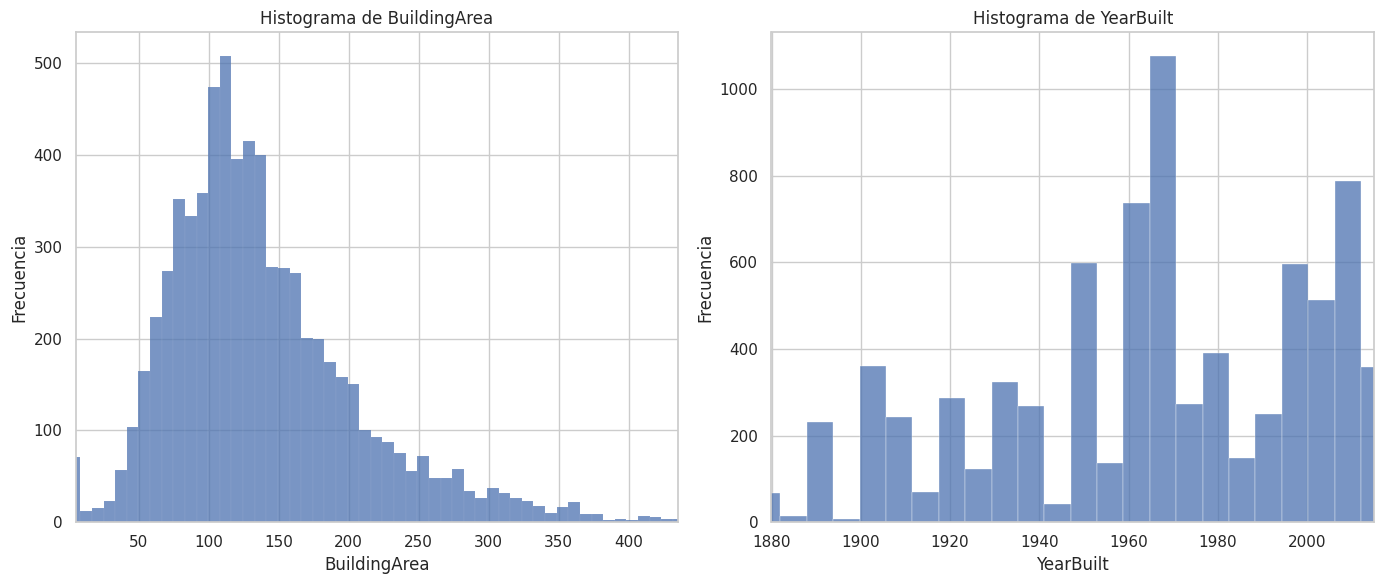

In [37]:
# @title Representaremos las regiones dentro del 1 al 99% de los valores
q99BA = melb_data_mice['BuildingArea'].quantile(0.99)
q01YB = melb_data_mice['YearBuilt'].quantile(0.01)
q01BA = melb_data_mice['BuildingArea'].quantile(0.01)
q99YB = melb_data_mice['YearBuilt'].quantile(0.99)


sns.set_theme(style="whitegrid")


# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_mice['BuildingArea'].dropna(), kde=False, ax=axes[0])
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt

# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_mice['YearBuilt'].dropna(), kde=False, ax=axes[1])
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlim(q01YB, q99YB)  # Establecer límites entre percentilplt

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# **Ahorra evaluaremos distinto tipo de Imputaciones**

Realizamos la imputacion a las columnas BuildingArea y YearBuilt. En primer instancia utilizaremos el IterativeImputer con el estimador KNeighborsRegressor.

In [39]:
#Imputador IterativeImputer
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
#hacemos una copia del data frame melb_data_mice
melb_data_miceIm = melb_data_mice.copy()
#Imputamos el data frame
melb_data_miceIm[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_miceIm[['YearBuilt', 'BuildingArea']])
melb_data_miceIm.sample(5)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Type_h  Type_t  Type_u  CouncilArea_Banyule  CouncilArea_Bayside  \
11381     1.0     0.0     0.0                  0.0                  0.0   
6941      1.0     0.0     0.0                  0.0                  0.0   
10878     1.0     0.0     0.0                  0.0                  0.0   
7058      1.0     0.0     0.0                  0.0                  0.0   
6403      1.0     0.0     0.0                  0.0                  0.0   

       CouncilArea_Boroondara  CouncilArea_Brimbank  CouncilArea_Cardinia  \
11381                     0.0                   0.0                   0.0   
6941                      0.0                   0.0                   0.0   
10878                     0.0                   1.0                   0.0   
7058                      0.0                   0.0                   0.0   
6403                      0.0                   0.0                   0.0   

       CouncilArea_Casey  CouncilArea_Darebin  ...  PostcodeST  Bedroom2ST  \
11381                0.0                  0.0  ...    2.456311         0.0   
6941                 0.0                  0.0  ...    0.766990         0.0   
10878                0.0                  0.0  ...   -0.456311         0.0   
7058                 0.0                  0.0  ...   -0.699029        -1.0   
6403                 0.0                  0.0  ...    0.941748         1.0   

       BathroomST  CarST  LandsizeST  LattitudeST  LongtitudeST  \
11381         1.0   -2.0    0.313559     1.218954     -3.350785   
6941          0.0   -1.0    0.563559    -0.862523      0.551278   
10878         1.0    2.0    0.489407     0.998498     -1.783954   
7058          0.0    0.0    0.059322     0.001969     -1.038651   
6403          0.0   -1.0   -0.432203    -0.529723     -0.041577   

       PropertycountST  BuildingArea  YearBuilt  
11381        -0.080323         163.4     1943.0  
6941         -0.353050         163.4     1943.0  
10878        -0.487817         163.4     1943.0  
7058         -0.249538         101.0     1960.0  
6403         -0.363468         163.4     1943.0  

[5 rows x 56 columns]

In [40]:
#@title Control de datos faltantes.
#Vemos la cantidad de datos faltantes (NaN)
#columna = "BuildingArea"
nan_count = melb_data_miceIm.isna().sum() #cuento NaN de una columna de interes
nan_count

Type_h                                   0
Type_t                                   0
Type_u                                   0
CouncilArea_Banyule                      0
CouncilArea_Bayside                      0
CouncilArea_Boroondara                   0
CouncilArea_Brimbank                     0
CouncilArea_Cardinia                     0
CouncilArea_Casey                        0
CouncilArea_Darebin                      0
CouncilArea_Frankston                    0
CouncilArea_Glen Eira                    0
CouncilArea_Greater Dandenong            0
CouncilArea_Hobsons Bay                  0
CouncilArea_Hume                         0
CouncilArea_Kingston                     0
CouncilArea_Knox                         0
CouncilArea_Manningham                   0
CouncilArea_Maribyrnong                  0
CouncilArea_Maroondah                    0
CouncilArea_Melbourne                    0
CouncilArea_Melton                       0
CouncilArea_Monash                       0
CouncilArea

# Graficos mostrando la distribución de cada variable (BuildingArea y YearBuilt) luego de ser imputada con IterativeImputer

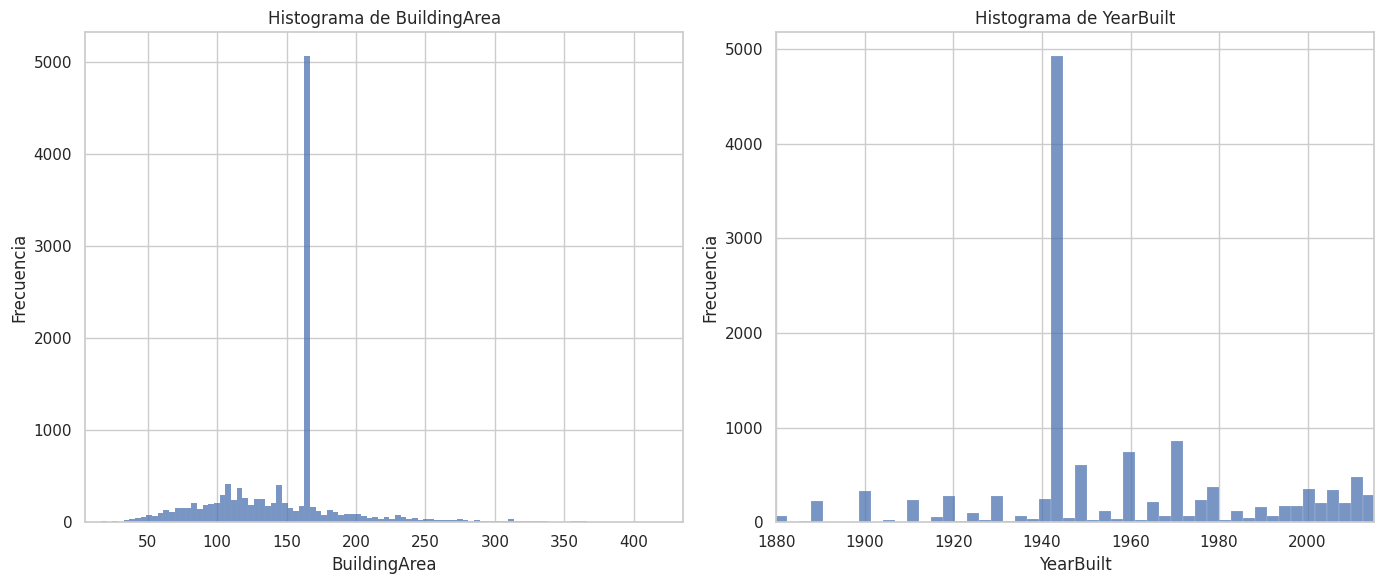

In [41]:
# @title
sns.set_theme(style="whitegrid")

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_miceIm['BuildingArea'], kde=False, ax=axes[0])
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
#axes[0].set_xlim(0, 1000)
axes[0].set_xlim(q01BA, q99BA)

# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_miceIm['YearBuilt'], kde=False, ax=axes[1])
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
#axes[1].set_xlim(1800, 2000)
axes[1].set_xlim(q01YB, q99YB)
# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# Imputacion 2: KNNImputer
Realizamos la imputacion a las columnas BuildingArea y YearBuilt. En este caso utilizaremos el KNNImputer.

In [42]:
from sklearn.impute import KNNImputer
#Copio el data frame
melb_data_miceKnn = melb_data_mice.copy()
#Establezco el imputador
knn_imputer = KNNImputer(n_neighbors=1, weights="uniform")

In [43]:
melb_data_miceKnn

Type_h  Type_t  Type_u  CouncilArea_Banyule  CouncilArea_Bayside  \
0         1.0     0.0     0.0                  0.0                  0.0   
1         1.0     0.0     0.0                  0.0                  0.0   
2         1.0     0.0     0.0                  0.0                  0.0   
3         1.0     0.0     0.0                  0.0                  0.0   
4         1.0     0.0     0.0                  0.0                  0.0   
...       ...     ...     ...                  ...                  ...   
13095     1.0     0.0     0.0                  0.0                  0.0   
13096     1.0     0.0     0.0                  0.0                  0.0   
13097     1.0     0.0     0.0                  0.0                  0.0   
13098     1.0     0.0     0.0                  0.0                  0.0   
13099     1.0     0.0     0.0                  0.0                  0.0   

       CouncilArea_Boroondara  CouncilArea_Brimbank  CouncilArea_Cardinia  \
0                         0.0                   0.0                   0.0   
1                         0.0                   0.0                   0.0   
2                         0.0                   0.0                   0.0   
3                         0.0                   0.0                   0.0   
4                         0.0                   0.0                   0.0   
...                       ...                   ...                   ...   
13095                     0.0                   0.0                   0.0   
13096                     0.0                   0.0                   0.0   
13097                     0.0                   0.0                   0.0   
13098                     0.0                   0.0                   0.0   
13099                     0.0                   0.0                   0.0   

       CouncilArea_Casey  CouncilArea_Darebin  ...  PostcodeST  Bedroom2ST  \
0                    0.0                  0.0  ...   -0.165049        -1.0   
1                    0.0                  0.0  ...   -0.165049        -1.0   
2                    0.0                  0.0  ...   -0.165049         0.0   
3                    0.0                  0.0  ...   -0.165049         0.0   
4                    0.0                  0.0  ...   -0.165049         0.0   
...                  ...                  ...  ...         ...         ...   
13095                0.0                  0.0  ...    0.640777         1.0   
13096                0.0                  0.0  ...   -0.660194         0.0   
13097                0.0                  0.0  ...   -0.660194         0.0   
13098                0.0                  0.0  ...   -0.660194         1.0   
13099                0.0                  0.0  ...   -0.689320         1.0   

       BathroomST  CarST  LandsizeST  LattitudeST  LongtitudeST  \
0             0.0   -1.0   -0.491525     0.014769     -0.013859   
1             0.0   -2.0   -0.588983    -0.066954     -0.052356   
2             1.0   -2.0   -0.635593    -0.080738     -0.044657   
3             1.0   -1.0   -0.720339     0.041354     -0.025408   
4             0.0    0.0   -0.665254    -0.060062     -0.046966   
...           ...    ...         ...          ...           ...   
13095         1.0    0.0    0.461864    -1.029120      1.288959   
13096         1.0    0.0   -0.213983    -0.572751     -0.932861   
13097         1.0    2.0    0.004237    -0.508455     -0.868648   
13098         0.0    3.0    0.915254    -0.570880     -0.825454   
13099         0.0   -1.0   -0.152542    -0.106142     -0.890899   

       PropertycountST  BuildingArea  YearBuilt  
0            -0.424130           NaN        NaN  
1            -0.424130          79.0     1900.0  
2            -0.424130         150.0     1900.0  
3            -0.424130           NaN        NaN  
4            -0.424130         142.0     2014.0  
...                ...           ...        ...  
13095         0.142665           NaN     1981.0  
13096        -0.027390         133.0   

In [44]:
# Get the number of columns
num_columns = melb_data_miceKnn.shape[1]

# Print the number of columns
print("Number of columns:", num_columns)

Number of columns: 56


In [45]:
#Imputamos solo las columnas BuildingArea y YearBuilt del dataframe
result = knn_imputer.fit_transform(melb_data_miceKnn)
melb_data_miceKnn.iloc[:,[54,55]] = result[:,[54,55]]
melb_data_miceKnn.iloc[:,[54,55]]


# Detect columns with any NaN values
columns_with_nan = melb_data_miceKnn.columns[melb_data_miceKnn.isna().any()].tolist()

# Print the columns that contain NaN values
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: []


# # Graficos mostrando la distribución de cada variable (BuildingArea y YearBuilt) luego de ser imputada con KNNImputer

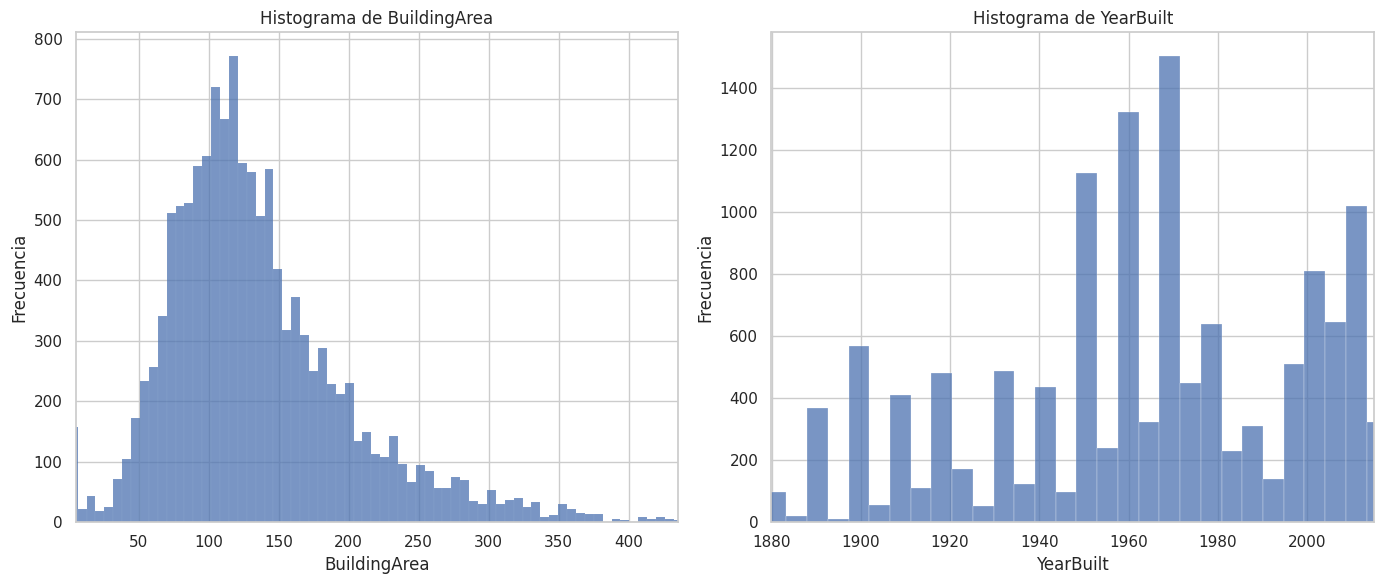

In [46]:
# @title
sns.set_theme(style="whitegrid")

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_miceKnn['BuildingArea'], kde=False, ax=axes[0])#, log_scale=True)
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlim(q01BA, q99BA)
# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_miceKnn['YearBuilt'],  kde=False, ax=axes[1])#, log_scale=True)
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlim(q01YB, q99YB)
# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# Comparación entre graficos de las distribuciones sin imputar e imputando con los métodos IterativeImpuer y KNNImputer

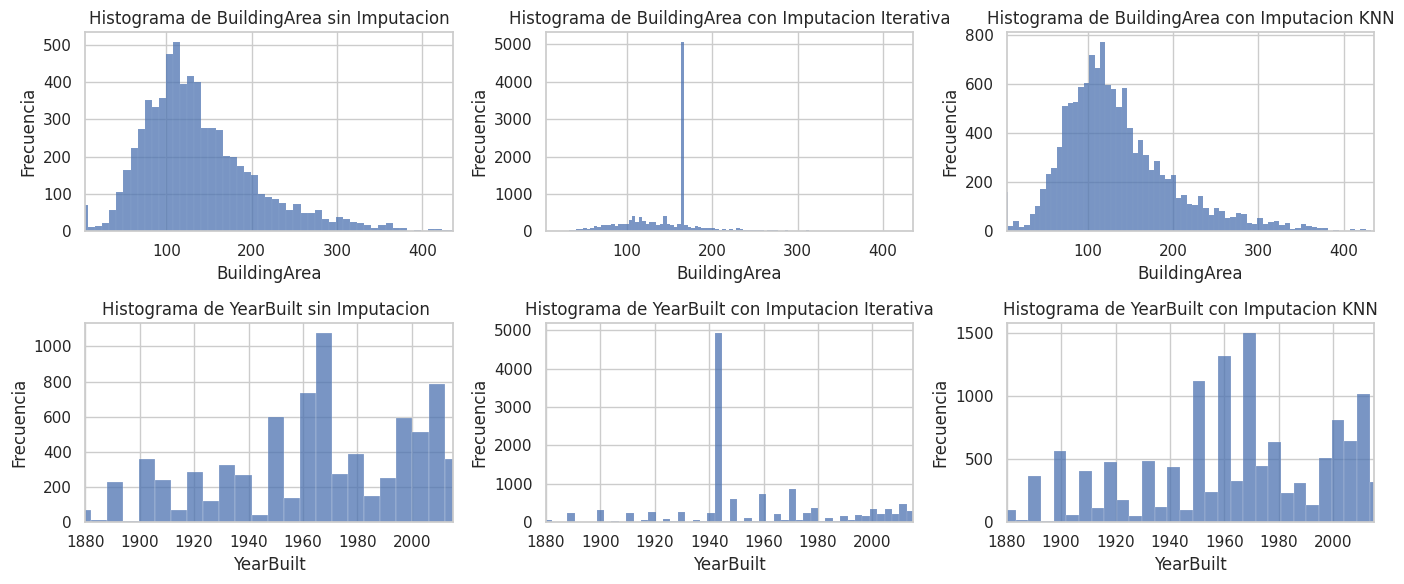

In [48]:
# @title
sns.set_theme(style="whitegrid")

# Crear una figura con dos subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_mice['BuildingArea'], kde=False, ax=axes[0,0])
axes[0,0].set_title('Histograma de BuildingArea sin Imputacion')
axes[0,0].set_xlabel('BuildingArea')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_xlim(q01BA, q99BA)
# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_miceIm['BuildingArea'], kde=False, ax=axes[0,1])
axes[0,1].set_title('Histograma de BuildingArea con Imputacion Iterativa')
axes[0,1].set_xlabel('BuildingArea')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt


sns.histplot(melb_data_miceKnn['BuildingArea'], kde=False, ax=axes[0,2])
axes[0,2].set_title('Histograma de BuildingArea con Imputacion KNN')
axes[0,2].set_xlabel('BuildingArea')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt


sns.histplot(melb_data_mice['YearBuilt'], kde=False, ax=axes[1,0])#, log_scale=True)
axes[1,0].set_title('Histograma de YearBuilt sin Imputacion ')
axes[1,0].set_xlabel('YearBuilt')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_xlim(q01YB, q99YB)

sns.histplot(melb_data_miceIm['YearBuilt'], kde=False, ax=axes[1,1])#, log_scale=True)
axes[1,1].set_title('Histograma de YearBuilt con Imputacion Iterativa')
axes[1,1].set_xlabel('YearBuilt')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_xlim(q01YB, q99YB)

sns.histplot(melb_data_miceKnn['YearBuilt'], kde=False, ax=axes[1,2])#, log_scale=True)
axes[1,2].set_title('Histograma de YearBuilt con Imputacion KNN')
axes[1,2].set_xlabel('YearBuilt')
axes[1,2].set_ylabel('Frecuencia')
axes[1,2].set_xlim(q01YB, q99YB)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# **Conclusiones**

## Viendo los graficos se puede concluir que la imputación **KNN** mantiene la distribución original (columnas sin imputar), no así la imputación iterativa.

## El DataFrame con los datos imputados con el KNN imputer es: "melb_data_miceKnn" Resta Estandarizar estas dos columnas para realizar el Análisis de PCA

No realizamos la limpieza antes de los outliers, para evitar limpiar también los datos faltantes,

A continuación haremos la limpieza de las columnas BuildingArea y de YearBuilt.
Posteriormente Estandrizaremos los valores, dejando un dataframe listo para realizar el Análisis PCA, y también un dataframe manteniendo como Objeto las variables categóricas que nos servirá para el análisis gráfico de Componentes principales, y para construir el archivo final a exportar.



In [49]:
#Realizo una copia del DataFrame obtenido en este punto para hacer la limpieza:
melb_df_imputed_nc = melb_data_miceKnn.copy()
melb_df_imputed_nc.reset_index(drop=True, inplace=True)



In [50]:
BA_YB = melb_df_imputed_nc[['BuildingArea', 'YearBuilt']]
BA_YB.columns
BA_YB_R = BA_YB.rename(columns={'BuildingArea': 'BArea_Full', 'YearBuilt': 'YBuilt_Full'})
BA_YB_R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BArea_Full   13100 non-null  float64
 1   YBuilt_Full  13100 non-null  float64
dtypes: float64(2)
memory usage: 204.8 KB


In [51]:
melb_df_ST.columns

Index(['RoomsST', 'PriceST', 'DistanceST', 'PostcodeST', 'Bedroom2ST',
       'BathroomST', 'CarST', 'LandsizeST', 'LattitudeST', 'LongtitudeST',
       'PropertycountST', 'Suburb', 'Address', 'Type', 'Method', 'SellerG',
       'Date', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'],
      dtype='object')

In [52]:
#@title Lipiaremos ahora los datos de las columnas 'YearBuilt' y 'BuildingArea'
#@title Criterios:
#@markdown YearBuilt: Propiedades a partir de 1850 (inclusive)
#@markdown BuildingArea: Rango entre el 0,5 y 99,5% para los valores
### Modelo
###df_filtered = df[(df['columna'] >= lower_bound) & (df['columna'] <= upper_bound) | df['columna'].isna()]

melb_df_imputed_nc1 = melb_df_imputed_nc[(melb_df_imputed_nc['YearBuilt'] >= 1850) | melb_df_imputed_nc['YearBuilt'].isna()]
melb_df_imputed_nc1.reset_index(drop=True, inplace=True)
#melb_df_imputed_nc1.info()

#melb_df_ST1 = melb_df_ST[[melb_df_ST['YearBuilt'] > 1850] | melb_df_ST['YearBuilt'].isna()]
q99BA_1 =  melb_df_imputed_nc1['BuildingArea'].quantile(0.995)
q01BA_1 =  melb_df_imputed_nc1['BuildingArea'].quantile(0.005)



melb_df_imputed_nc2 = melb_df_imputed_nc1[(melb_df_imputed_nc1['BuildingArea'] >= q01BA_1) & (melb_df_imputed_nc1['BuildingArea'] <= q99BA_1) | melb_df_imputed_nc1['BuildingArea'].isna()]

#melb_df_ST2 =  melb_df_ST1[( melb_df_ST1['BuildingArea'] >= q99BA_all) & ( melb_df_ST1['BuildingArea'] <= q99BA_all)]
melb_df_imputed_nc2.reset_index(drop=True, inplace=True)

melb_df_imputed_nc2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_h                                 12969 non-null  float64
 1   Type_t                                 12969 non-null  float64
 2   Type_u                                 12969 non-null  float64
 3   CouncilArea_Banyule                    12969 non-null  float64
 4   CouncilArea_Bayside                    12969 non-null  float64
 5   CouncilArea_Boroondara                 12969 non-null  float64
 6   CouncilArea_Brimbank                   12969 non-null  float64
 7   CouncilArea_Cardinia                   12969 non-null  float64
 8   CouncilArea_Casey                      12969 non-null  float64
 9   CouncilArea_Darebin                    12969 non-null  float64
 10  CouncilArea_Frankston                  12969 non-null  float64
 11  Co

In [53]:
melb_df_ST_A = melb_df_ST.drop(columns=['YearBuilt','BuildingArea'])
melb_df_ST_B = pd.concat([melb_df_ST_A, BA_YB_R.reset_index(drop=True)], axis=1)

melb_df_ST_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RoomsST          13100 non-null  float64
 1   PriceST          13100 non-null  float64
 2   DistanceST       13100 non-null  float64
 3   PostcodeST       13100 non-null  float64
 4   Bedroom2ST       13100 non-null  float64
 5   BathroomST       13100 non-null  float64
 6   CarST            13100 non-null  float64
 7   LandsizeST       13100 non-null  float64
 8   LattitudeST      13100 non-null  float64
 9   LongtitudeST     13100 non-null  float64
 10  PropertycountST  13100 non-null  float64
 11  Suburb           13100 non-null  object 
 12  Address          13100 non-null  object 
 13  Type             13100 non-null  object 
 14  Method           13100 non-null  object 
 15  SellerG          13100 non-null  object 
 16  Date             13100 non-null  object 
 17  CouncilArea 

In [117]:
# @title
### Hcemos lo mismo para el DF completo
### Modelo
###df_filtered = df[(df['columna'] >= lower_bound) & (df['columna'] <= upper_bound) | df['columna'].isna()]
melb_df_ST1 = melb_df_ST_B[(melb_df_ST_B['YBuilt_Full'] >= 1850) | melb_df_ST_B['YBuilt_Full'].isna()]
melb_df_ST1.reset_index(drop=True, inplace=True)


#melb_df_ST1 = melb_df_ST[[melb_df_ST['YearBuilt'] > 1850] | melb_df_ST['YearBuilt'].isna()]
q99BA_all =  melb_df_ST1['BArea_Full'].quantile(0.995)
q01BA_all =  melb_df_ST1['BArea_Full'].quantile(0.005)



melb_df_ST2 = melb_df_ST1[(melb_df_ST1['BArea_Full'] >= q01BA_all) & (melb_df_ST1['BArea_Full'] <= q99BA_all) | melb_df_ST1['BArea_Full'].isna()]
melb_df_ST2.reset_index(drop=True, inplace=True)

#melb_df_ST2 =  melb_df_ST1[( melb_df_ST1['BuildingArea'] >= q99BA_all) & ( melb_df_ST1['BuildingArea'] <= q99BA_all)]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RoomsST          12969 non-null  float64
 1   PriceST          12969 non-null  float64
 2   DistanceST       12969 non-null  float64
 3   PostcodeST       12969 non-null  float64
 4   Bedroom2ST       12969 non-null  float64
 5   BathroomST       12969 non-null  float64
 6   CarST            12969 non-null  float64
 7   LandsizeST       12969 non-null  float64
 8   LattitudeST      12969 non-null  float64
 9   LongtitudeST     12969 non-null  float64
 10  PropertycountST  12969 non-null  float64
 11  Suburb           12969 non-null  object 
 12  Address          12969 non-null  object 
 13  Type             12969 non-null  object 
 14  Method           12969 non-null  object 
 15  SellerG          12969 non-null  object 
 16  Date             12969 non-null  object 
 17  CouncilArea 

# Quedó la Tabla **"melb_df_imputed_nc2"** con 3 columnas categóricas Codificadas, las columnas numéricas estandarizadas, salvo YearBuilt y BuildingArea limpias (**sin outliers y con Imputaciones**)
# Dejaremos la Tabla **"melb_df_ST2"** limpia, con los valores numéricos  de YearBuilt y BuildingArea con imputaciones. Posteriormente a esta tabla le agregaremos YearBuilt y BuildingArea Estandarizados, para finalmente agregarle las dos columnas de PCA.
##Esta tabla será empleada para realizar distintos gráficos y análisis

# Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:

Aplique PCA para obtener  𝑛  componentes principales de la matriz, donde n = min(20, X.shape[0]). ¿Es necesario estandarizar o escalar los datos?
Seleccione las primeras  2  columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

# Aplicamos PCA
A continuación aplicamos PCA con n componentes principales donde n se define como:
n = min(20,X_array.shape[0])
También imprimimos en pantalla algunos datos de interes.

**1) Seleccionar las Variables Numéricas de importancia para el Análisis PCA**
- Descartamos las variables Numéricas:

LandSize


**2) Transformar los datos numéricos para eviatar problemas de sesgo en el Análisis PCA por diferencias en la magnitud de distintas variables**
- Hay que realizar Transformaciones en las columnas:

YearBuilt

BuildingArea

In [118]:
#@title Paso 1: Estandarizar las columnas recientemente imputadas 'YearBuilt' y 'BuildingArea'

# Suponiendo que tienes un archivo CSV
columns_to_ST = ['YearBuilt', 'BuildingArea']

df_to_scale_last = melb_df_imputed_nc2[columns_to_ST]


# Paso 2: Seleccionar las columnas numéricas
numeric_columns_last = df_to_scale_last.columns


# Paso 4: Ajustar y transformar los datos con las 4 Aproximaciones
df_scaled2_last = scaler2.fit_transform(melb_df_imputed_nc2[numeric_columns_last])


# Paso 5: Crear un nuevo DataFrame con los datos transformados
df_scaled2_last = pd.DataFrame(df_scaled2_last, columns=numeric_columns_last)

# Renombro las columnas YearBuild y BuildingArea agregando el sufijo ST

new_column_names = [col + 'ST' for col in df_scaled2_last.columns]
df_scaled2_last.columns = new_column_names


# Si quieres mantener las columnas no numéricas en el DataFrame final
melb_data_miceKnn_ST = pd.concat([melb_df_imputed_nc2, df_scaled2_last.reset_index(drop=True)], axis=1)
melb_data_miceKnn_ST.reset_index(drop=True, inplace=True)
# Mostrar el nuevo DataFrame transformado
melb_data_miceKnn_ST.info()

#### Lo pego al DataFrame con todos los datos:
melb_df_ST3 = pd.concat([melb_df_ST2, df_scaled2_last.reset_index(drop=True)], axis=1)
melb_df_ST3.reset_index(drop=True, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_h                                 12969 non-null  float64
 1   Type_t                                 12969 non-null  float64
 2   Type_u                                 12969 non-null  float64
 3   CouncilArea_Banyule                    12969 non-null  float64
 4   CouncilArea_Bayside                    12969 non-null  float64
 5   CouncilArea_Boroondara                 12969 non-null  float64
 6   CouncilArea_Brimbank                   12969 non-null  float64
 7   CouncilArea_Cardinia                   12969 non-null  float64
 8   CouncilArea_Casey                      12969 non-null  float64
 9   CouncilArea_Darebin                    12969 non-null  float64
 10  CouncilArea_Frankston                  12969 non-null  float64
 11  Co

In [120]:
#@title Paso 1 Crear el nuevo DataFrame sin las columnas sin Estandarizar pero con YearBuiltST y BuildingAreaST
columns_to_remove = ['YearBuilt', 'BuildingArea']


melb_data_miceKnn_ST_PCA = melb_data_miceKnn_ST.drop(columns=[col for col in columns_to_remove if col in melb_data_miceKnn_ST.columns])

#melb_OneHot_df.info()
melb_data_miceKnn_ST_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_h                                 12969 non-null  float64
 1   Type_t                                 12969 non-null  float64
 2   Type_u                                 12969 non-null  float64
 3   CouncilArea_Banyule                    12969 non-null  float64
 4   CouncilArea_Bayside                    12969 non-null  float64
 5   CouncilArea_Boroondara                 12969 non-null  float64
 6   CouncilArea_Brimbank                   12969 non-null  float64
 7   CouncilArea_Cardinia                   12969 non-null  float64
 8   CouncilArea_Casey                      12969 non-null  float64
 9   CouncilArea_Darebin                    12969 non-null  float64
 10  CouncilArea_Frankston                  12969 non-null  float64
 11  Co

## Creamos el DataFrame "melb_data_miceKnn_ST_PCA" que emplearemos para el análisis de PCA

In [121]:
# Guardar el DataFrame en un archivo
melb_data_miceKnn_ST_PCA.rename(columns={'CouncilArea_nan': 'CouncilArea_nulos'}, inplace=True)
melb_data_miceKnn_ST_PCA.columns


Index(['Type_h', 'Type_t', 'Type_u', 'CouncilArea_Banyule',
       'CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank',
       'CouncilArea_Cardinia', 'CouncilArea_Casey', 'CouncilArea_Darebin',
       'CouncilArea_Frankston', 'CouncilArea_Glen Eira',
       'CouncilArea_Greater Dandenong', 'CouncilArea_Hobsons Bay',
       'CouncilArea_Hume', 'CouncilArea_Kingston', 'CouncilArea_Knox',
       'CouncilArea_Manningham', 'CouncilArea_Maribyrnong',
       'CouncilArea_Maroondah', 'CouncilArea_Melbourne', 'CouncilArea_Melton',
       'CouncilArea_Monash', 'CouncilArea_Moonee Valley',
       'CouncilArea_Moreland', 'CouncilArea_Nillumbik',
       'CouncilArea_Port Phillip', 'CouncilArea_Stonnington',
       'CouncilArea_Unavailable', 'CouncilArea_Whitehorse',
       'CouncilArea_Whittlesea', 'CouncilArea_Wyndham', 'CouncilArea_Yarra',
       'CouncilArea_Yarra Ranges', 'CouncilArea_nulos',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'R

In [122]:
nan_count = melb_data_miceKnn_ST_PCA.isna().sum() #cuento NaN de una columna de interes
nan_count

Type_h                                   0
Type_t                                   0
Type_u                                   0
CouncilArea_Banyule                      0
CouncilArea_Bayside                      0
CouncilArea_Boroondara                   0
CouncilArea_Brimbank                     0
CouncilArea_Cardinia                     0
CouncilArea_Casey                        0
CouncilArea_Darebin                      0
CouncilArea_Frankston                    0
CouncilArea_Glen Eira                    0
CouncilArea_Greater Dandenong            0
CouncilArea_Hobsons Bay                  0
CouncilArea_Hume                         0
CouncilArea_Kingston                     0
CouncilArea_Knox                         0
CouncilArea_Manningham                   0
CouncilArea_Maribyrnong                  0
CouncilArea_Maroondah                    0
CouncilArea_Melbourne                    0
CouncilArea_Melton                       0
CouncilArea_Monash                       0
CouncilArea

# Vamos a realizar Análisis de Componentes Principales sobre distintas combinaciones de Datos:


1.   Todos los Datos (55 variables o columnas)
      Numéricos Estandarizados (13 columnas)
      Type (3 columnas)
      Regionname (8 columnas)
      CouncilArea (32 columnas)
2.   Numéricos Estandarizados (13 columnas)
      Type (3 columnas)
      Regionname (8 columnas)
3.   Numéricos Estandarizados - Seleccionados (8 a 10 columnas)
      Type (3 columnas)
      Regionname (8 columnas)



In [124]:
#@title 1) "Analisis de Componentes Principales empleando las 56 variables"
from sklearn.decomposition import PCA



# Definir el número de componentes principales
n = min(20, melb_data_miceKnn_ST_PCA.shape[0])

# Aplicar PCA
pca = PCA(n_components=n)
principal_components = pca.fit_transform(melb_data_miceKnn_ST_PCA)

In [125]:
# Crear un DataFrame con las dos primeras componentes principales
pca_df = pd.DataFrame(data=principal_components[:, :2], columns=['PCA1_1', 'PCA1_2'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
final_df = melb_data_miceKnn_ST_PCA.reset_index(drop=True)
final_df_PCA = pd.concat([final_df, pca_df], axis=1)
melb_df_ST3_PCA1 = pd.concat([melb_df_ST3, pca_df], axis=1).reset_index(drop=True)

In [126]:
melb_df_ST3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RoomsST          12969 non-null  float64
 1   PriceST          12969 non-null  float64
 2   DistanceST       12969 non-null  float64
 3   PostcodeST       12969 non-null  float64
 4   Bedroom2ST       12969 non-null  float64
 5   BathroomST       12969 non-null  float64
 6   CarST            12969 non-null  float64
 7   LandsizeST       12969 non-null  float64
 8   LattitudeST      12969 non-null  float64
 9   LongtitudeST     12969 non-null  float64
 10  PropertycountST  12969 non-null  float64
 11  Suburb           12969 non-null  object 
 12  Address          12969 non-null  object 
 13  Type             12969 non-null  object 
 14  Method           12969 non-null  object 
 15  SellerG          12969 non-null  object 
 16  Date             12969 non-null  object 
 17  CouncilArea 

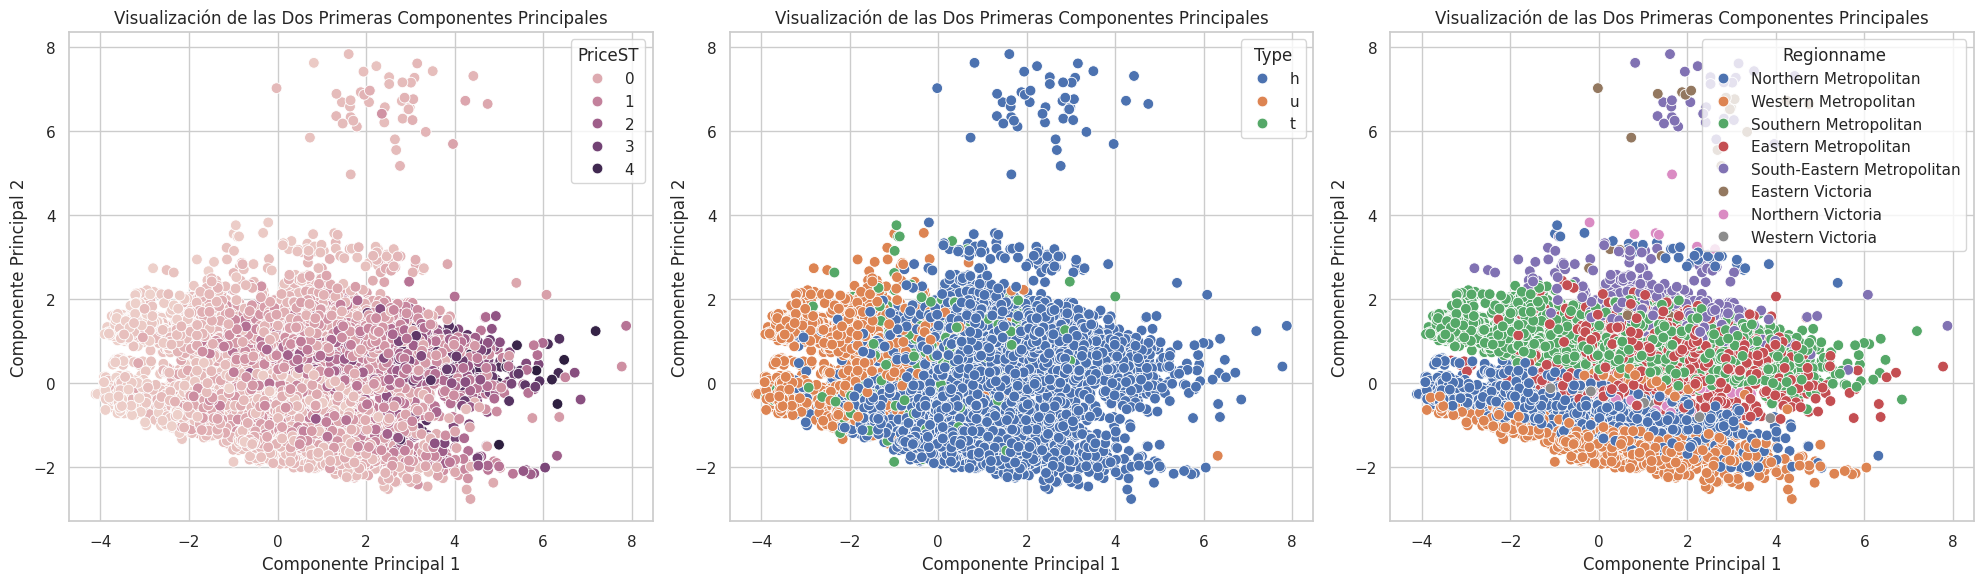

In [127]:

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# First plot
sns.scatterplot(ax=axes[0], x='PCA1_1', y='PCA1_2', data=melb_df_ST3_PCA1, hue='PriceST', s=60)
axes[0].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True)

# Second plot
sns.scatterplot(ax=axes[1], x='PCA1_1', y='PCA1_2', data=melb_df_ST3_PCA1, hue='Type', s=60)
axes[1].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')
axes[1].grid(True)

# Third plot
sns.scatterplot(ax=axes[2], x='PCA1_1', y='PCA1_2', data=melb_df_ST3_PCA1, hue='Regionname', s=60)
axes[2].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[2].set_xlabel('Componente Principal 1')
axes[2].set_ylabel('Componente Principal 2')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure to a file
#plt.savefig('side_by_side_plots.png')

# Show the plots
plt.show()


In [128]:
#@title ¿Qué sucedería si eliminamos la variable CouncilArea del análisis PCA?
# Identify columns to exclude
exclude_council = [colC for colC in melb_data_miceKnn_ST_PCA.columns if colC.startswith('CouncilArea_')]

# Drop the identified columns
df_scaled_all_important_NCouncil = melb_data_miceKnn_ST_PCA.drop(columns=exclude_council)

df_scaled_all_important_NCouncil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_h                                 12969 non-null  float64
 1   Type_t                                 12969 non-null  float64
 2   Type_u                                 12969 non-null  float64
 3   Regionname_Eastern Metropolitan        12969 non-null  float64
 4   Regionname_Eastern Victoria            12969 non-null  float64
 5   Regionname_Northern Metropolitan       12969 non-null  float64
 6   Regionname_Northern Victoria           12969 non-null  float64
 7   Regionname_South-Eastern Metropolitan  12969 non-null  float64
 8   Regionname_Southern Metropolitan       12969 non-null  float64
 9   Regionname_Western Metropolitan        12969 non-null  float64
 10  Regionname_Western Victoria            12969 non-null  float64
 11  Ro

In [129]:

# Definir el número de componentes principales
n = min(20, df_scaled_all_important_NCouncil.shape[0])

# Aplicar PCA
pca = PCA(n_components=n)
principal_components_NCouncil = pca.fit_transform(df_scaled_all_important_NCouncil)

# Crear un DataFrame con las dos primeras componentes principales
pca_df_NCouncil = pd.DataFrame(data=principal_components_NCouncil[:, :2], columns=['PCA2_1', 'PCA2_2'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
final_df = melb_data_miceKnn_ST_PCA.reset_index(drop=True)
final_df_PCA2 = pd.concat([final_df_PCA, pca_df_NCouncil], axis=1)
melb_df_ST3_PCA2 = pd.concat([melb_df_ST3_PCA1, pca_df_NCouncil], axis=1).reset_index(drop=True)

# Crear un DataFrame con las dos primeras componentes principales
#pca_df_NS = pd.DataFrame(data=df_scaled_all_important_NCouncil[:, :2], columns=['PCA2_1', 'PCA2_2'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
#final_df_NS = df_scaled_all_important.reset_index(drop=True)
#final_df_NS = pd.concat([final_df, pca_df_NS], axis=1)



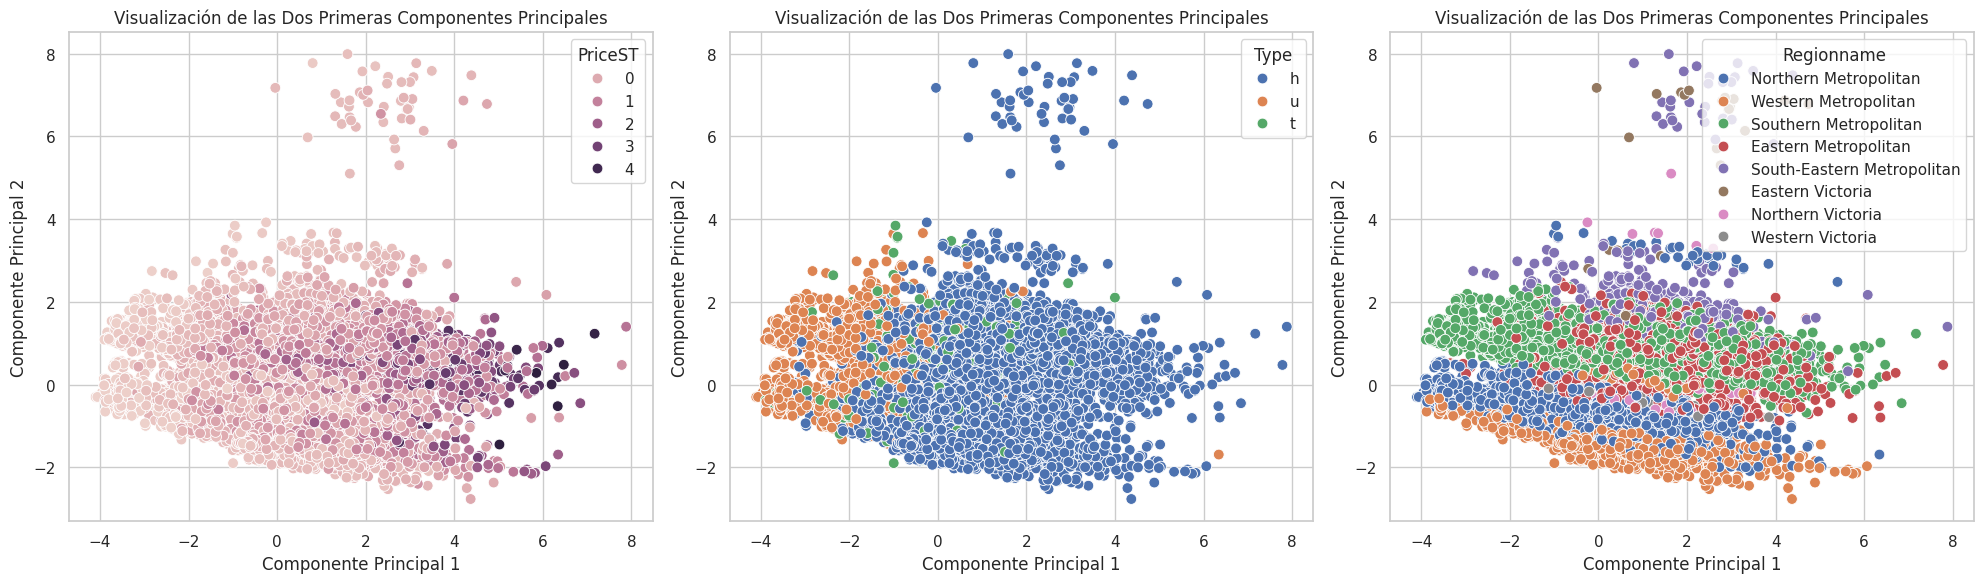

In [130]:
#@title Grafíco de la Segunda Alternativa Sin Council
# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# First plot
sns.scatterplot(ax=axes[0], x='PCA2_1', y='PCA2_2', data=melb_df_ST3_PCA2, hue='PriceST', s=60)
axes[0].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True)

# Second plot
sns.scatterplot(ax=axes[1], x='PCA2_1', y='PCA2_2', data=melb_df_ST3_PCA2, hue='Type', s=60)
axes[1].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')
axes[1].grid(True)

# Third plot
sns.scatterplot(ax=axes[2], x='PCA2_1', y='PCA2_2', data=melb_df_ST3_PCA2, hue='Regionname', s=60)
axes[2].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[2].set_xlabel('Componente Principal 1')
axes[2].set_ylabel('Componente Principal 2')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure to a file
#plt.savefig('side_by_side_plots.png')

# Show the plots
plt.show()


# Seguimos probando distintas combinaciones de variables de matrices de Datos para hacer el PCA



In [131]:
#@title Qué Pasa si excluimos algunas variables numéricas como 'Landsize', 'Postcode', Latitud, longitud y PropertyCount
#@title Paso 1 Crear el nuevo DataFrame sin la Información de LandSize, Postcode, Latitud, Longitud
columns_to_remove_P1 = ['PostcodeST', 'LattitudeST','LongtitudeST', 'LandsizeST', 'PropertyCountST' ]

principal_components_NCouncil_NNum = df_scaled_all_important_NCouncil.drop(columns=[col for col in columns_to_remove if col in df_scaled_all_important_NCouncil.columns])


#df_scaled_all_important_P1.info()

# Ahora viene PCA
# Definir el número de componentes principales
n = min(20, principal_components_NCouncil_NNum.shape[0])

# Aplicar PCA
pca = PCA(n_components=n)
principal_components_P1 = pca.fit_transform(principal_components_NCouncil_NNum)


# Crear un DataFrame con las dos primeras componentes principales
pca_df_P1 = pd.DataFrame(data=principal_components_P1[:, :2], columns=['PCA3_1', 'PCA3_2'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
final_df_P1 = final_df_PCA2.reset_index(drop=True)
final_df_PCA3 = pd.concat([final_df_PCA2, pca_df_P1], axis=1).reset_index(drop=True)
melb_df_ST3_PCA3 = pd.concat([melb_df_ST3_PCA2, pca_df_P1], axis=1).reset_index(drop=True)



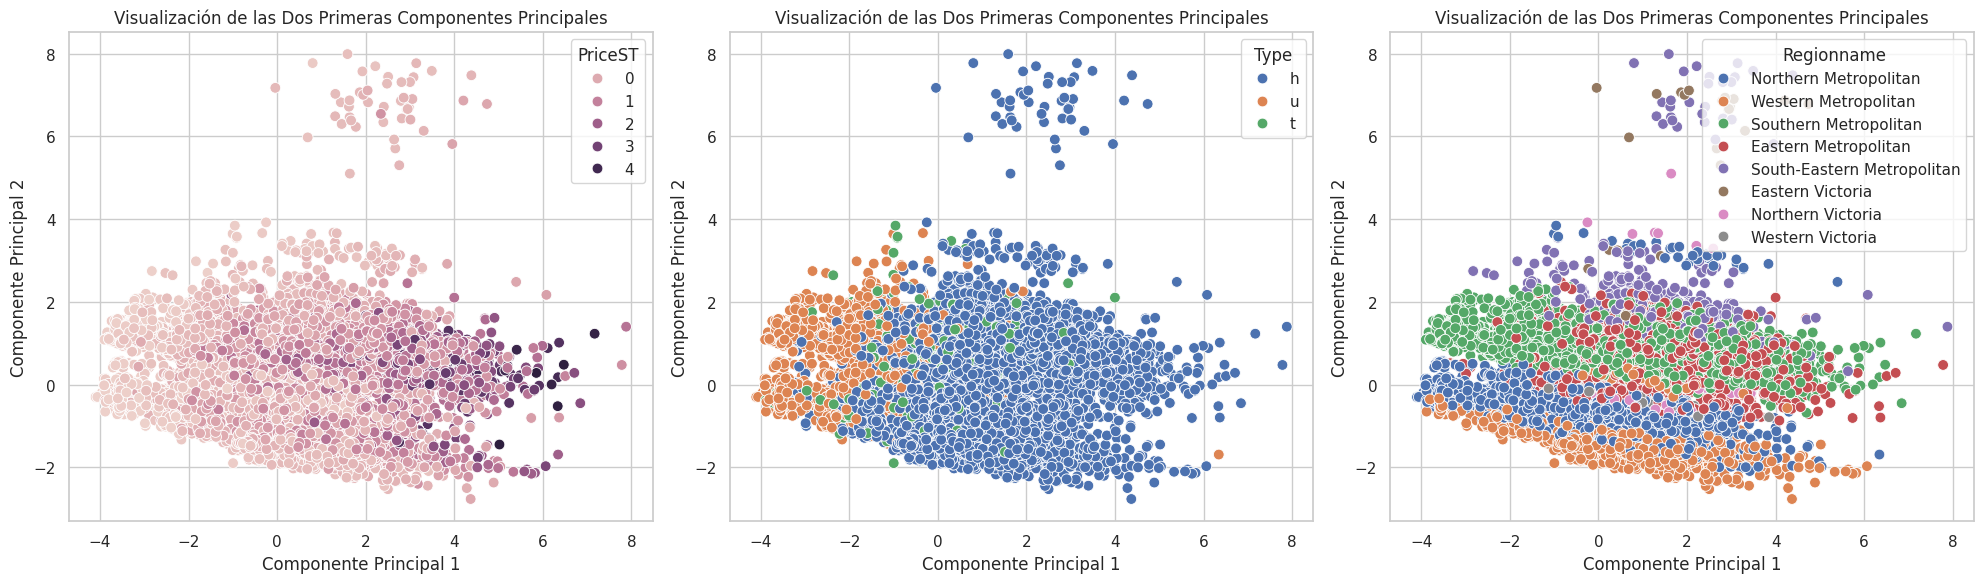

In [133]:
#@title Grafíco de la Segunda Alternativa Sin Council y con menos valores
# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# First plot
sns.scatterplot(ax=axes[0], x='PCA3_1', y='PCA3_2', data=melb_df_ST3_PCA3, hue='PriceST', s=60)
axes[0].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True)

# Second plot
sns.scatterplot(ax=axes[1], x='PCA3_1', y='PCA3_2', data=melb_df_ST3_PCA3, hue='Type', s=60)
axes[1].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')
axes[1].grid(True)

# Third plot
sns.scatterplot(ax=axes[2], x='PCA3_1', y='PCA3_2', data=melb_df_ST3_PCA3, hue='Regionname', s=60)
axes[2].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[2].set_xlabel('Componente Principal 1')
axes[2].set_ylabel('Componente Principal 2')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure to a file
#plt.savefig('side_by_side_plots.png')

# Show the plots
plt.show()


In [134]:
#@title Qué Pasa si además de excluir algunas variables numéricas como 'Landsize', 'Postcode', Latitud, longitud y PropertyCount excluimos también Regionname
#@title Paso 1 Crear el nuevo DataFrame sin la Información de LandSize, Postcode, Latitud, Longitud


columns_to_remove_P2 = ['PostcodeST', 'LattitudeST','LongtitudeST', 'LandsizeST', 'PropertycountST', 'DistanceST' ]

principal_components_NCouncil_NNum2 = df_scaled_all_important_NCouncil.drop(columns=[col for col in columns_to_remove_P2 if col in df_scaled_all_important_NCouncil.columns])

# Identify columns to exclude
exclude_Region = [colR for colR in principal_components_NCouncil_NNum2.columns if colR.startswith('Regionname_')]

# Drop the identified columns
principal_components_NCouncil_NRegion_NNum2 = principal_components_NCouncil_NNum2.drop(columns=exclude_Region)

principal_components_NCouncil_NRegion_NNum2.info()
#df_scaled_all_important_P1.info()

# Ahora viene PCA
# Definir el número de componentes principales
n = min(10, principal_components_NCouncil_NRegion_NNum2.shape[0])

# Aplicar PCA
pca = PCA(n_components=n)
principal_components_P2 = pca.fit_transform(principal_components_NCouncil_NRegion_NNum2)


# Crear un DataFrame con las dos primeras componentes principales
pca_df_P2 = pd.DataFrame(data=principal_components_P2[:, :2], columns=['PCA4_1', 'PCA4_2'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
final_df_P4 = final_df_PCA3.reset_index(drop=True)
final_df_PCA3 = pd.concat([final_df_PCA3, pca_df_P2], axis=1).reset_index(drop=True)
melb_df_ST3_PCA4 = pd.concat([melb_df_ST3_PCA3, pca_df_P2], axis=1).reset_index(drop=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type_h          12969 non-null  float64
 1   Type_t          12969 non-null  float64
 2   Type_u          12969 non-null  float64
 3   RoomsST         12969 non-null  float64
 4   PriceST         12969 non-null  float64
 5   Bedroom2ST      12969 non-null  float64
 6   BathroomST      12969 non-null  float64
 7   CarST           12969 non-null  float64
 8   YearBuiltST     12969 non-null  float64
 9   BuildingAreaST  12969 non-null  float64
dtypes: float64(10)
memory usage: 1013.3 KB


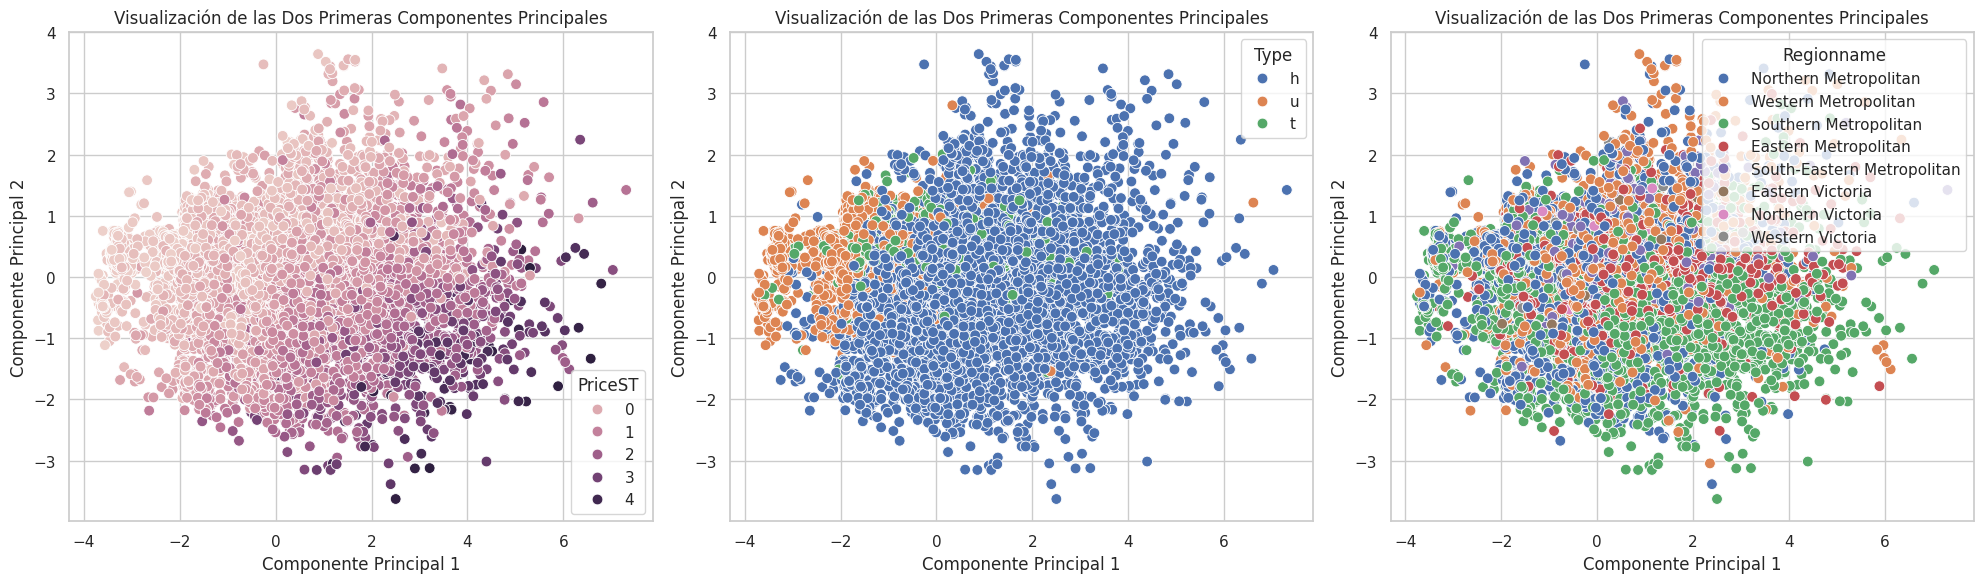

In [136]:
#@title Grafíco de la Segunda Alternativa Sin Council, sin RegionName y con menos valores
# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# First plot
sns.scatterplot(ax=axes[0], x='PCA4_1', y='PCA4_2', data=melb_df_ST3_PCA4, hue='PriceST', s=60)
axes[0].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True)

# Second plot
sns.scatterplot(ax=axes[1], x='PCA4_1', y='PCA4_2', data=melb_df_ST3_PCA4, hue='Type', s=60)
axes[1].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')
axes[1].grid(True)

# Third plot
sns.scatterplot(ax=axes[2], x='PCA4_1', y='PCA4_2', data=melb_df_ST3_PCA4, hue='Regionname', s=60)
axes[2].set_title('Visualización de las Dos Primeras Componentes Principales')
axes[2].set_xlabel('Componente Principal 1')
axes[2].set_ylabel('Componente Principal 2')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure to a file
#plt.savefig('side_by_side_plots.png')

# Show the plots
plt.show()


In [138]:
melb_df_ST3_PCA4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RoomsST          12969 non-null  float64
 1   PriceST          12969 non-null  float64
 2   DistanceST       12969 non-null  float64
 3   PostcodeST       12969 non-null  float64
 4   Bedroom2ST       12969 non-null  float64
 5   BathroomST       12969 non-null  float64
 6   CarST            12969 non-null  float64
 7   LandsizeST       12969 non-null  float64
 8   LattitudeST      12969 non-null  float64
 9   LongtitudeST     12969 non-null  float64
 10  PropertycountST  12969 non-null  float64
 11  Suburb           12969 non-null  object 
 12  Address          12969 non-null  object 
 13  Type             12969 non-null  object 
 14  Method           12969 non-null  object 
 15  SellerG          12969 non-null  object 
 16  Date             12969 non-null  object 
 17  CouncilArea 

In [139]:
final_df_PCA3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_h                                 12969 non-null  float64
 1   Type_t                                 12969 non-null  float64
 2   Type_u                                 12969 non-null  float64
 3   CouncilArea_Banyule                    12969 non-null  float64
 4   CouncilArea_Bayside                    12969 non-null  float64
 5   CouncilArea_Boroondara                 12969 non-null  float64
 6   CouncilArea_Brimbank                   12969 non-null  float64
 7   CouncilArea_Cardinia                   12969 non-null  float64
 8   CouncilArea_Casey                      12969 non-null  float64
 9   CouncilArea_Darebin                    12969 non-null  float64
 10  CouncilArea_Frankston                  12969 non-null  float64
 11  Co

# **Conclusiones**
Trabajando con más o menos de las variables categóricas obtenemos distintos perfiles en el Análisis de PCA.

Puede verse cómo se pueden identificar regiones en los gráficos de Componentes Principales al colorear o bien por "Type" o "Regionname"

Al disminuir las variables a trabajar se pierde un poco el detallle logrado al trabajar con todas, o casi todas las variables.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

# Guardamos 2 archivos:
1) El dataframe con las variables categóricas, transformadas o codificadas, junto a las variables Numéricas Limpias o Filtradas y Estandarizadas. Sumadas las distintas salidas del Análisis de Componentes Principales
Archivo:

2) El Dataframe con las Variables Numéricas Lipias, Filtradas y Estandarizadas (Modificamos los Nombres incluyendo ST). Se suman a este DataFrame las variables categóricas orginales y las variables del análisis de Componentes principales.



In [140]:
# Guardar el DataFrame en un archivo
# DataFrame empleado para el Análisis PCA
final_df_PCA3.to_csv('Encoded_ST_Imp_df_PCA4', index= False)

#DataFrame Conteniendo variables categóricas originales, y numéricas estandarizadas, más resultados PCA
melb_df_ST3_PCA4.to_csv('NonEncoded_ST_Imp_df_PCA4.csv', index=False)

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final.

In [ ]:
documentation = """
# Documentación del Proceso de Transformación

Descarga de Base de Datos:
'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'

## Características Base:

13580 Entradas con 21 Columnas de Variables, No todas las Filas de Datos están completas

## Lista de Variables:

# Información del Data Set - 21 Columnas:

0 - Suburb: region - <font color ="Blue"> **Objeto**

1 - Address: property address - <font color ="Blue"> **Objeto**

2 - Rooms: Number of rooms - <font color ="Green"> **Numérica**

3 - Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential. - <font color ="Blue"> **Objeto**

4 - Price: Price in dollars - <font color ="Green"> **Numérica**

5 - Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. - <font color ="Blue"> **Objeto**

6 - SellerG: Real Estate Agent - <font color ="Blue"> **Objeto**

7 - Date: Date sold - <font color ="Blue"> **Objeto**

8 - Distance: Distance from CBD - <font color ="Green"> **Numérica**

9 - PostCode - <font color ="Green"> **Numérica**

10 - Bedroom2 : Scraped # of Bedrooms (from different source) - <font color ="Green"> **Numérica**

11 - Bathroom: Number of Bathrooms - <font color ="Green"> **Numérica**

12 - Car: Number of carspots - <font color ="Green"> **Numérica**

13 - Landsize: Land Size - <font color ="Green"> **Numérica**

14 - BuildingArea: Building Size - <font color ="Green"> **Numérica**

15 - YearBuilt - <font color ="Green"> **Numérica**

16 - CouncilArea: Governing council for the area - <font color ="Blue"> **Objeto**

17 - Lattitude - <font color ="Green"> **Numérica**

18 - Logitude - <font color ="Green"> **Numérica**

19 - Regionname: General Region (West, North West, North, North east …etc) - <font color ="Blue"> **Objeto**

20 - Propertycount: Number of properties that exist in the suburb. - <font color ="Green"> **Numérica**


## Análisis de Distribución Estadística de Variables Numéricas:
1 - Seleccionamos inicialmente todas las variables numéricas:
'Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount'

Descartamos
BuildingArea, YearBuilt - Están Incompletas y se emplearán luego para Imputación posterior

1.A. Realizamos Gráficos BoxenPlot sobre estas Variables.
Hay algunas variables que presentan datos muy elevados, o muy bajos.

1.B. Se realizará una limpieza por quantiles
Para no borrar muchos datos, seleccionamos el rango 0.005 > < 0.995, sobre las variables:
'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car' ,'Landsize',

Que eran las que presentaban mayor dispersión

de 13580 bajamos a 13100

1.C Repetimos gráficos BoxenPlot e incluimos Histogramas de distribución.

A partir del Análisis de Distribuciones Notamos que en LandSize hay muchos datos con "0" Superficie. No sabemos si incluirla en los pasos de Análisis de PCA

## Análisis de Transformaciones:
2) Se evaluaron distintos métodos de Estandarización (sobre las columnas numéricas indicadas anteriormente) empleando sklearn:
StandarScaler
RobustScaler
MinMaxScaler
Normalizer

Analizamos Histogramas de distribución, analizamos la media y la desviación de cada método.

Seleccionamos RobustScaler, enfunción de la documentación, los valores de medias y desviación.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#robustscaler

Tras este trabajo

## Encoding:

Seleccionamos para el Encoding, 4 de las 8 variables categóricas
'Type', 'CouncilArea', 'Regionname'

Las otras variables categóricas fueron rechazadas porque
a) Tenían muchas variables únicas, por ej. Adress
b) Consideramos que no eran pertinentes para el posterior análisis de PCA: Date, Method, Seller, Suburb, Adress

Analizamos histogramas de distribución de estas variables.

El total de valores unicos para estas variables es:
Valores Unicos en las variable categoric Type: 3
Valores Unicos en las variable categoric CouncilArea: 32
Valores Unicos en las variable categoric Regionname: 8

Esto nos da un total de 43 Columnas + 1 Columna de índices = 44 Columnas en el DataFrame Tras el Encoding con `OneHotEncoder` de sklearn.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Le sumamos luego 11 variables numéricas

Queda un DataFrame con 55 columnas

## Imputaciones

Incluimos las columnas `BuildingArea` y `YearBuilt` para su imputación.

Analizamos el número de datos faltantes:

47.42% de la columna BuildingArea de datos son datos faltantes.
39.53% de la columna YearBuilt de datos son datos faltantes.

Probamos 2 imputaciones y realizamos los gráficos de distribución correspondientes.
Las imputaciones se realizaron con `IterativeImputer` con `KNeighborsRegressor` de sklearn.
https://scikit-learn.org/stable/modules/impute.html

Tras las imputaciones analizamos la distribución de variables, con IterativeImputer se modifica la distribución.
Mientras que con `KNeighborsRegressor` se mantiene una distribución similar a la Original, pero ahora con mayor volúmen de datos.

Tras la imputación, previo al análisis de PCA:
1) Realizamos la limpieza de Datos:
Descartamos propiedades construidas antes de 1850
Realizamos una limpieza por Quartiles en BuildingArea, quedándonos con un rango 0,5 % hasta 99,5%
Tras esta limpieza el set final de datos quedó en 12969 datos
Luego transformamos estos datos (YearBuilt y BuildingArea) con RobustScaler
y lo incluimos en la matríz de datos.


## **PCA**: Se aplicó PCA para reducir la dimensionalidad, seleccionando las dos primeras componentes principales.
Estas dos componetes principales se agregaron a la matríz de datos final.

Se probaron 4 Alternativas de Set de Datos de PCA, y cada una se graficó coloreando por Type, Precio y Regionname.
En algunas de estas combinaciones se pudo observar agrupamiento de datos, compartiendo propiedades comunes, como Región, o tipo de vivienda

Las Alternativas evaluadas en el Análisis de PCA fueron:
1) Emplear las 55 variables del DataFrame - melb_data_miceKnn_ST_PCA
2) Limpiar de Este DataFrame las variables CouncilArea (Son 32 columnas)
3) Limpiar de Este DataFrame las variables CouncilArea (Son 32 columnas) y las numéricas ['PostcodeST', 'LattitudeST','LongtitudeST', 'LandsizeST', 'PropertyCountST' ]
4) Limpiar de Este DataFrame las variables CouncilArea y Regioname (Son 40 columnas) y las numéricas ['PostcodeST', 'LattitudeST','LongtitudeST', 'LandsizeST', 'PropertycountST', 'DistanceST' ]

Tras estos Análisis se añadieron 8 columnas a los data Sets:
final_df_PCA3 (Variables Categóricas Codificadas, Numéricas estandarizadas e imputadas)
melb_df_ST3_PCA4 (Variables Categóricas Originales, Numéricas estandarizadas e imputadas)

PCA1_1; PCA1_2.    Primer Análisis de PCA
PCA2_1; PCA2_2     Segundo Análisis de PCA
PCA3_1; PCA3_2     Tercer Análisis de PCA
PCA4_1; PCA4_2     Cuarto Análisis de PCA


Finalmente se generaron dos archivos .csv con esos resultados

Encoded_ST_Imp_df_PCA4: Variables Categóricas Codificadas, Numéricas estandarizadas e imputadas
NonEncoded_ST_Imp_df_PCA4: Variables Categóricas Originales, Numéricas estandarizadas e imputadas
